# Tilani Wijamunige - LSE Data Analytics Online Career Accelerator


## Course 2 : Diagnostic Analysis using Python

### My Approach


- Study and understand the data.
- Identify different time frames.
- Decode the meaning of codes/column titles.
- Assess if metadata is useful.
- Decide whether to merge the data frames.
- Research NHS GP appointment stories.
- Clarify objectives and problem statement.
- Utilise Python libraries and ChatGPT.
- Analyse trends and insights.
- Document findings and conclusions.

## Objectives 

**Areas of concerns by the data provided**

- Utalistaion of NHS services
- Missed appointments
- Using Extra data sources such as Twitter (Now X)
 


## My Thought Process


**ON THE NEWS**

"The NHS incurs significant, potentially avoidable, costs when patients miss general practitioner (GP) appointments. The reasons for missed appointments need to be better understood as explained by The British Medical Association (BMA) chair Professor Philip Banfield:
While it is frustrating when patients do not attend, the reasons why this happens should be investigated rather than simply resorting to punishing them. Financially penalising patients inevitably impact the poorest and most vulnerable in the communti".
  

**GOVERNMENT APPROACH**

Reducing or eliminating missed appointments would be beneficial financially as well as socially. 
The government needs a data-informed approach to decide how best to handle this problem.

**NHS**

Goal : Expand its infrastructure and resources to match its increasing population capacity > Budget correctly > Understand the utilisation trends   of each component in its network.

Questions facing by the NHS :

1.	Has there been adequate staff and capacity in the networks?
2.	What was the actual utilisation of resources?

**STAKEHOLDERS**


- Stakeholder 1 > NHS’s capacity should be increased 
- Stakeholder 2 > The current capacity is adequate. Efforts to make better use of existing infrastructure and resources are sufficient.


**ANALYST**

- Business questions >>  actionable analytic questions 
- Plan and perform the exploratory data analysis
- Present the insights to the respective stakeholders.


**PROBLEM STATEMENT**

The National Health Service (NHS) faces significant financial losses due to missed general practitioner (GP) appointments, a problem aggravated by insufficient understanding of the underlying reasons, as highlighted by the British Medical Association (BMA). Rather than financially penalising patients, a measure that could unreasonably affect the poorest and most vulnerable, the government needs a data-driven approach to address this issue. 

To achieve this, the NHS aims to expand its infrastructure and resources in line with the growing population, ensure proper budgeting, and comprehend utilisation trends across its network.
 
However, stakeholders are divided, with some advocating for increased capacity while others believe that optimising the existing infrastructure and resources will suffice. Addressing these concerns involves determining whether the current staff and capacity are adequate and assessing the actual utilisation of resources



**QUESTIONS**

1. What is the number of locations, service settings, context types, national categories, and appointment statuses in the data sets?
2. What is the date range of the provided data sets, and which service settings reported the most appointments for a specific period?
3. What is the number of appointments and records per month?
4. What monthly and seasonal trends are evident, based on the number of appointments for service settings, context types, and national    categories?
5. What are the top trending hashtags (#) on the supplied Twitter data set and how can this be used in the decision-making process?
6. Was there adequate staff and capacity in the networks?
7. What was the actual utilisation of resources?
8. What insights can be gained by looking at missed appointments?
9. What are the most important patterns visible in the data relating to the use case?
10. What insights can be gained from the data, and what recommendations can be made to the NHS based on these insights?


### Prepare The workstation

In [21]:
# Import the necessary libraries.
import pandas as pd
import numpy as np

# Optional - Ignore warnings.
import warnings
warnings.filterwarnings('ignore')

**Actual duration data -‘ad’ data frame**

In [183]:
# Import and sense-check the actual_duration.csv data set as ad.
ad = pd.read_csv('actual_duration.csv')
            
# View ad  DataFrame.
ad

,sub_icb_location_code,sub_icb_location_ons_code,sub_icb_location_name,icb_ons_code,region_ons_code,appointment_date,actual_duration,count_of_appointments
0,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,31-60 Minutes,364
1,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,21-30 Minutes,619
2,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,6-10 Minutes,1698
3,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,Unknown / Data Quality,1277
4,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,16-20 Minutes,730
...,...,...,...,...,...,...,...,...
137788,X2C4Y,E38000254,NHS West Yorkshire ICB - X2C4Y,E54000054,E40000012,30-Jun-22,31-60 Minutes,430
137789,X2C4Y,E38000254,NHS West Yorkshire ICB - X2C4Y,E54000054,E40000012,30-Jun-22,21-30 Minutes,751
137790,X2C4Y,E38000254,NHS West Yorkshire ICB - X2C4Y,E54000054,E40000012,30-Jun-22,16-20 Minutes,921
137791,X2C4Y,E38000254,NHS West Yorkshire ICB - X2C4Y,E54000054,E40000012,30-Jun-22,11-15 Minutes,1439


In [171]:
# Find out if there are any duplicates in the ad data frame

# Check for duplicates
ad_dup = ad.duplicated().sum()

# print the count the number of duplicate rows
print(f"Number of duplicate rows in ad df: {ad_dup }")

Number of duplicate rows in ad df: 0


In [23]:
# List all the column names in ad df(to avoid typos later)
ad_columns= ad.columns.tolist()
ad_columns

['sub_icb_location_code',
 'sub_icb_location_ons_code',
 'sub_icb_location_name',
 'icb_ons_code',
 'region_ons_code',
 'appointment_date',
 'actual_duration',
 'count_of_appointments']

In [24]:
# Determine whether there are missing values in 'ad' df.
ad.isnull().sum()

sub_icb_location_code        0
sub_icb_location_ons_code    0
sub_icb_location_name        0
icb_ons_code                 0
region_ons_code              0
appointment_date             0
actual_duration              0
count_of_appointments        0
dtype: int64

In [25]:
# Determine the metadata of the data set.
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137793 entries, 0 to 137792
Data columns (total 8 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   sub_icb_location_code      137793 non-null  object
 1   sub_icb_location_ons_code  137793 non-null  object
 2   sub_icb_location_name      137793 non-null  object
 3   icb_ons_code               137793 non-null  object
 4   region_ons_code            137793 non-null  object
 5   appointment_date           137793 non-null  object
 6   actual_duration            137793 non-null  object
 7   count_of_appointments      137793 non-null  int64 
dtypes: int64(1), object(7)
memory usage: 8.4+ MB


In [26]:
# Determine the descriptive statistics of the ad data set and round to 2 decimal places
ad.describe().round(2)

,count_of_appointments
count,137793.00
mean,1219.08
std,1546.90
min,1.00
25%,194.00
50%,696.00
75%,1621.00
max,15400.00


**Appointment regional data - ‘ar’ data frame**

In [187]:
# Import and sense-check the appointments_regional.csv data set as ar.
ar = pd.read_csv('appointments_regional.csv')

# View armDataFrame.
ar

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,E54000034,2020-01,Attended,GP,Face-to-Face,1 Day,8107
1,E54000034,2020-01,Attended,GP,Face-to-Face,15 to 21 Days,6791
2,E54000034,2020-01,Attended,GP,Face-to-Face,2 to 7 Days,20686
3,E54000034,2020-01,Attended,GP,Face-to-Face,22 to 28 Days,4268
4,E54000034,2020-01,Attended,GP,Face-to-Face,8 to 14 Days,11971
...,...,...,...,...,...,...,...
596816,E54000050,2022-06,Unknown,Unknown,Unknown,2 to 7 Days,21
596817,E54000050,2022-06,Unknown,Unknown,Unknown,22 to 28 Days,8
596818,E54000050,2022-06,Unknown,Unknown,Unknown,8 to 14 Days,28
596819,E54000050,2022-06,Unknown,Unknown,Unknown,More than 28 Days,17


In [173]:
# Find out if there are any duplicates in the ar data frame
# Check for duplicates
ar_dup = ar.duplicated().sum()

# print the count the number of duplicate rows
print(f"Number of duplicate rows in ar df: {ar_dup }")

Number of duplicate rows in ar df: 21604


In [181]:
# Create a 'clean' ar df without duplicates
ar_clean = ar.drop_duplicates()

# View the clean ar the DataFrame.
ar_clean

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,E54000034,2020-01,Attended,GP,Face-to-Face,1 Day,8107
1,E54000034,2020-01,Attended,GP,Face-to-Face,15 to 21 Days,6791
2,E54000034,2020-01,Attended,GP,Face-to-Face,2 to 7 Days,20686
3,E54000034,2020-01,Attended,GP,Face-to-Face,22 to 28 Days,4268
4,E54000034,2020-01,Attended,GP,Face-to-Face,8 to 14 Days,11971
...,...,...,...,...,...,...,...
596813,E54000050,2022-06,Unknown,Unknown,Telephone,Same Day,10
596815,E54000050,2022-06,Unknown,Unknown,Unknown,15 to 21 Days,13
596816,E54000050,2022-06,Unknown,Unknown,Unknown,2 to 7 Days,21
596818,E54000050,2022-06,Unknown,Unknown,Unknown,8 to 14 Days,28


In [189]:
# Save the clean ar DataFrame to a new CSV file
ar_clean.to_csv('appointments_regional_clean.csv', index=False)

print("Clean data set saved to 'appointments_regional_clean.csv'")

Clean data set saved to 'appointments_regional_clean.csv'


**Appointment regional_clean data - ‘ar_clean’ data frame**

In [225]:
# Import the cleaned data frame.
ar_clean = pd.read_csv('appointments_regional_clean.csv')

# Print and make sure ar_clean is indeed a dataframe
print(f"Type of ar_clean: {type(ar_clean_reimported)}")

Type of ar_clean: <class 'pandas.core.frame.DataFrame'>


In [217]:
# Determine whether there are missing values in ar_clean df
missing_values = ar_clean.isnull().sum()

# Print the count of missing values in each column
print(missing_values)

icb_ons_code                         0
appointment_month                    0
appointment_status                   0
hcp_type                             0
appointment_mode                     0
time_between_book_and_appointment    0
count_of_appointments                0
dtype: int64


In [219]:
# List all the column names in ar_clean df(to avoid typos later)
ar_clean_columns= ad.columns.tolist()
ar_clean_columns

['sub_icb_location_code',
 'sub_icb_location_ons_code',
 'sub_icb_location_name',
 'icb_ons_code',
 'region_ons_code',
 'appointment_date',
 'actual_duration',
 'count_of_appointments']

In [221]:
# Determine the metadata of the data set.
ar_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 575217 entries, 0 to 575216
Data columns (total 7 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   icb_ons_code                       575217 non-null  object
 1   appointment_month                  575217 non-null  object
 2   appointment_status                 575217 non-null  object
 3   hcp_type                           575217 non-null  object
 4   appointment_mode                   575217 non-null  object
 5   time_between_book_and_appointment  575217 non-null  object
 6   count_of_appointments              575217 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 30.7+ MB


In [223]:
# Determine the descriptive statistics of the ar_clean df and round to 2 decimal places
ar_clean.describe().round(2)

,count_of_appointments
count,575217.00
mean,1290.87
std,5960.87
min,1.00
25%,8.00
50%,52.00
75%,332.00
max,211265.00


**National categories data - ‘nc’ data frame**

In [32]:
# Import and sense-check the national_categories.xlsx data set as nc.
nc = pd.read_excel('national_categories.xlsx')

# View the DataFrame.
nc

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
0,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Patient contact during Care Home Round,3,2021-08
1,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Other,Care Related Encounter,Planned Clinics,7,2021-08
2,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Home Visit,79,2021-08
3,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,General Consultation Acute,725,2021-08
4,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Structured Medication Review,2,2021-08
...,...,...,...,...,...,...,...,...
817389,2022-06-30,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,Unplanned Clinical Activity,12,2022-06
817390,2022-06-30,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,Planned Clinics,4,2022-06
817391,2022-06-30,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,Planned Clinical Procedure,92,2022-06
817392,2022-06-30,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,General Consultation Routine,4,2022-06


In [227]:
# Find out if there are any duplicates in the nc data frame
# Check for duplicates
nc_dup = nc.duplicated().sum()

# print the count the number of duplicate rows
print(f"Number of duplicate rows in nc df: {nc_dup}")

Number of duplicate rows in nc df: 0


In [229]:
# List all the column names in nc df(to avoid typos in the column names)
nc_columns= ad.columns.tolist()
nc_columns

['sub_icb_location_code',
 'sub_icb_location_ons_code',
 'sub_icb_location_name',
 'icb_ons_code',
 'region_ons_code',
 'appointment_date',
 'actual_duration',
 'count_of_appointments']

In [34]:
# Determine whether there are missing values.
nc.isnull().sum()

appointment_date         0
icb_ons_code             0
sub_icb_location_name    0
service_setting          0
context_type             0
national_category        0
count_of_appointments    0
appointment_month        0
dtype: int64

In [35]:
# Determine the metadata of the data set.
nc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 817394 entries, 0 to 817393
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   appointment_date       817394 non-null  datetime64[ns]
 1   icb_ons_code           817394 non-null  object        
 2   sub_icb_location_name  817394 non-null  object        
 3   service_setting        817394 non-null  object        
 4   context_type           817394 non-null  object        
 5   national_category      817394 non-null  object        
 6   count_of_appointments  817394 non-null  int64         
 7   appointment_month      817394 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 49.9+ MB


### Explore the data set

**Question 1:** How many locations are there in the data set?

In [231]:
# Import the actual_duration.csv data set as ad.
ad = pd.read_csv('actual_duration.csv')

# Count unique locations in ad data frame using 'region_ons_code'
unique_locs_ad_regions = ad['region_ons_code'].nunique()
print(f"Unique locations in ad (region_ons_code): {unique_locs_ad_regions}")

# Count unique locations in ad data frame using 'icb_ons_code'
unique_locs_ad_icb = ad['icb_ons_code'].nunique()
print(f"Unique locations in ad (icb_ons_code): {unique_locs_ad_icb}")

# Count unique locations in ad data frame using 'sub_icb_location_ons_code'
unique_locs_ad_subicb = ad['sub_icb_location_ons_code'].nunique()
print(f"Unique locations in ad (sub_icb_location_ons_code): {unique_locs_ad_subicb}")


Unique locations in ad (region_ons_code): 7
Unique locations in ad (icb_ons_code): 42
Unique locations in ad (sub_icb_location_ons_code): 106


**Answer** :According to the ad data frame, there are 7 regions, 42 ICB (Integrated Care Board) locations and 106  Sub-ICB locations in the data set. (ICB and Sub ICB counts match up with the data from nc data frame as well)

**Question 2:** What are the five locations with the highest number of appointments?



In [259]:
# Determine the top five locations based on record count in nc data frame.

# Get the counts of each unique location using value_counts
location_counts = nc['sub_icb_location_name'].value_counts()

# Get the sum of appointments for each location using groupby and sum
appointments_sum = nc.groupby('sub_icb_location_name')['count_of_appointments'].sum()

# Combine the counts and sums into a DataFrame
combined = pd.DataFrame({
    'Total Appointment Count': appointments_sum,
    'Record Count': location_counts
})

# Sort by the total appointment count and select the top 5 locations
top_five_locations = combined.sort_values(by='Total Appointment Count', 
                                          ascending=False).head(5)

# Reset index to have a clean DataFrame
top_five_locations.reset_index(inplace=True)
top_five_locations.rename(columns={'index': 'Sub ICB Location'}, inplace=True)

# Display the results as a table
print("Top Five Locations Based on Total Appointment Count in nc df :\n")
top_five_locations

Top Five Locations Based on Total Appointment Count in nc df :



,sub_icb_location_name,Total Appointment Count,Record Count
0,NHS North West London ICB - W2U3Z,12142390,13007
1,NHS North East London ICB - A3A8R,9588891,11837
2,NHS Kent and Medway ICB - 91Q,9286167,12637
3,NHS Hampshire and Isle Of Wight ICB - D9Y0V,8288102,12171
4,NHS South East London ICB - 72Q,7850170,10527


In [232]:
# Additional : Determine the top five locations based on record count in ad data frame.

# Get the counts of each unique location using value_counts
location_counts = ad['sub_icb_location_name'].value_counts()

# Get the sum of appointments for each location using groupby and sum
appointments_sum = ad.groupby('sub_icb_location_name')['count_of_appointments'].sum()

# Combine the counts and sums into a DataFrame
combined = pd.DataFrame({
    'Total Appointment Count': appointments_sum,
    'Record Count': location_counts
})

# Sort by the total appointment count and select the top 5 locations
top_five_locations = combined.sort_values(by='Total Appointment Count', 
                                          ascending=False).head(5)

# Reset index to have a clean DataFrame
top_five_locations.reset_index(inplace=True)
top_five_locations.rename(columns={'index': 'Sub ICB Location'}, inplace=True)

# Display the results as a table
print("Top Five Locations Based on Total Appointment Count in ad df:\n")
top_five_locations

Top Five Locations Based on Total Appointment Count in ad df:



,sub_icb_location_name,Total Appointment Count,Record Count
0,NHS North West London ICB - W2U3Z,6976986,1484
1,NHS North East London ICB - A3A8R,5341883,1484
2,NHS Kent and Medway ICB - 91Q,5209641,1484
3,NHS Hampshire and Isle Of Wight ICB - D9Y0V,4712737,1328
4,NHS South East London ICB - 72Q,4360079,1358


Note: Record Count helps identify locations with potential data entry issues. Discrepancies between record count and appointment count can indicate data quality issues.

Additional : Creating a csv file with NHS England Regions , as published on NHS England (Region) (July 2022) Names and Codes in EN (https://geoportal.statistics.gov.uk) and merging it with ‘ad’ df

In [3]:
# Use NHS regions code file ('nhs_regions.csv')downloaded from/
# 'Integrated Care Boards (July 2022) Names and Codes in EN' and/
# merged with the ad frame

import pandas as pd

# Read the CSV file 'actual_duration.csv' into a DataFrame
ad = pd.read_csv('actual_duration.csv')

# Read the CSV file 'nhs_regions.csv' into a DataFrame
regions = pd.read_csv('nhs_regions.csv')

# Merging the data frames
ad_regions = pd.merge(ad, regions, on='region_ons_code', how='left')

# view 'ad_regions'
ad_regions.head()

,sub_icb_location_code,sub_icb_location_ons_code,sub_icb_location_name,icb_ons_code,region_ons_code,appointment_date,actual_duration,count_of_appointments,nhs_regions
0,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,31-60 Minutes,364,North East and Yorkshire
1,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,21-30 Minutes,619,North East and Yorkshire
2,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,6-10 Minutes,1698,North East and Yorkshire
3,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,Unknown / Data Quality,1277,North East and Yorkshire
4,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,16-20 Minutes,730,North East and Yorkshire


In [5]:
# Additional : Determine the top five locations based on record count in ad_regions data frame

# Read the CSV file 'ad_regions.csv' into a DataFrame
ad_regions = pd.read_csv('ad_regions.csv')

# Group by 'sub_icb_location_name' and 'nhs_regions', then sum the 'count_of_appointments'
top_regions = ad_regions.groupby(['nhs_regions','sub_icb_location_name',])\
              ['count_of_appointments'].sum().reset_index()

# Sort the grouped data in descending order
sorted_df = top_regions.sort_values(by='count_of_appointments', ascending=False)

# Rename the columns
sorted_df.columns = ['Region Name', 'Sub Region Name', 'Total Appointments']

# Display the top 10 locations by total appointments
sorted_df.head()


,Region Name,Sub Region Name,Total Appointments
16,London,NHS North West London ICB - W2U3Z,6976986
15,London,NHS North East London ICB - A3A8R,5341883
94,South East,NHS Kent and Medway ICB - 91Q,5209641
93,South East,NHS Hampshire and Isle Of Wight ICB - D9Y0V,4712737
17,London,NHS South East London ICB - 72Q,4360079


In [258]:
# Save the DataFrame to an Excel file
sorted_df.to_excel('top_10_appointments.xlsx', index=False)

In [11]:
# Average count of appointments for each region

# Read the CSV file 'ad_regions.csv' into a DataFrame
ad_regions = pd.read_csv('ad_regions.csv')

# Scale the 'count_of_appointments' to thousands
ad_regions['count_of_appointments'] = ad_regions['count_of_appointments'] / 1000

# Group by 'nhs_regions' and 'sub_icb_location_name', then sum the scaled 'count_of_appointments'
top_regions = ad_regions.groupby(['nhs_regions', 'sub_icb_location_name'])\
             ['count_of_appointments'].sum().reset_index()

# Sort the grouped data in descending order
sorted_df = top_regions.sort_values(by='count_of_appointments', ascending=False)

# Rename the columns
sorted_df.columns = ['Region Name', 'Sub Region Name', 'Total Appointments (x1000)']

# Group by 'Region Name' to calculate the total and average appointments per region
region_summary = sorted_df.groupby('Region Name').agg(
    Total_Appointments=('Total Appointments (x1000)', 'sum'),
    Average_Appointments=('Total Appointments (x1000)', 'mean')
).reset_index()

# Round the average appointments to 2 decimal places
region_summary['Average_Appointments'] = region_summary['Average_Appointments'].round(2)

# Display the first few rows of the summary
region_summary.head()


,Region Name,Total_Appointments,Average_Appointments
0,East of England,19546.694,1396.19
1,London,24488.519,4897.70
2,Midlands,32574.555,1714.45
3,North East and Yorkshire,27425.610,1192.42
4,North West,19880.924,736.33


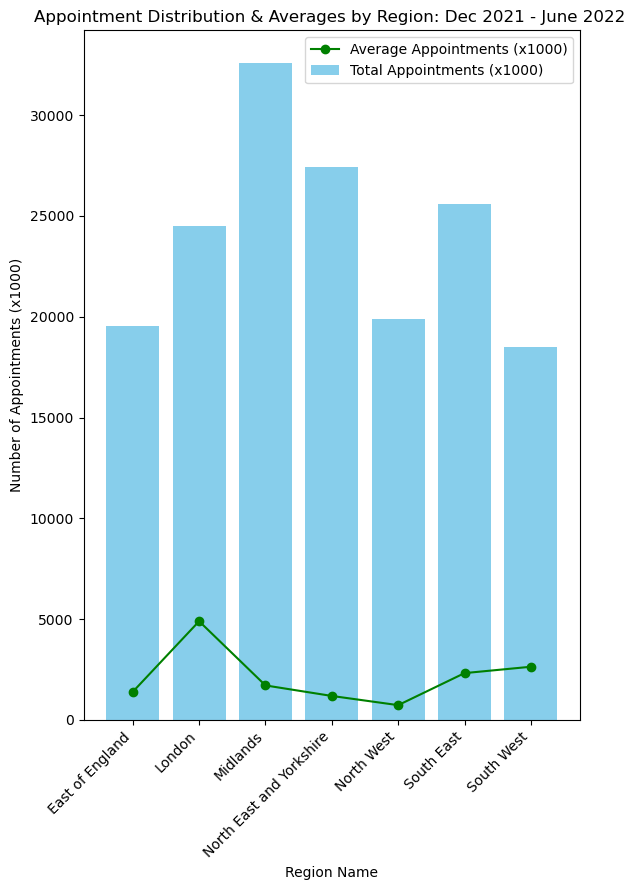

In [15]:
# Average count of appointments
# Plotting the graph

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 9))

# Disable the grid
plt.grid(False)

plt.bar(region_summary['Region Name'], region_summary['Total_Appointments'], 
        color='skyblue', label='Total Appointments (x1000)')
plt.plot(region_summary['Region Name'], region_summary['Average_Appointments'], 
         color='green', marker='o', linestyle='-', label='Average Appointments (x1000)')

# Add titles and labels
plt.title('Appointment Distribution & Averages by Region: Dec 2021 - June 2022 ')
plt.xlabel('Region Name')
plt.ylabel('Number of Appointments (x1000)')
plt.xticks(rotation=45, ha='right')

plt.legend(fontsize=10)

# Adjust layout 
plt.tight_layout()

# Save the plot
plt.savefig('Appointment Distribution and Averages by Region.png')

# Display the plot
plt.show()


London : Highest average appointment count, Midland : Highest Total appointment count , Possibly due to Population density, resource availability, data inconsistencies (This data covers only 7 months) , Need more data   

**Question 3:** How many service settings, context types, national categories, and appointment statuses are there?

 **service settings - nc df**

In [19]:
# Import and sense-check the national_categories.xlsx data set as nc.
nc = pd.read_excel('national_categories.xlsx')

# Get the counts of unique service settings
service_setting_counts = nc['service_setting'].value_counts()

# Get the sum of appointments for each service setting using groupby and sum
appointments_sum = nc.groupby('service_setting')['count_of_appointments'].sum()

# Combine the counts and sums into a DataFrame
ss_combined = pd.DataFrame({
    'Total Appointment Count': appointments_sum,
    'Record Count': service_setting_counts
})

# Sort the DataFrame by Total Appointment Count in descending order
ss_combined = ss_combined.sort_values(by='Total Appointment Count',\ 
                                      ascending=False)

# Reset index to have a clean DataFrame and include Service Setting as a column
ss_combined.reset_index(inplace=True)

# Display the results as a table
print("Service Setting and Total Appointment Count")
ss_combined


Service Setting and Total Appointment Count


,service_setting,Total Appointment Count,Record Count
0,General Practice,270811691,359274
1,Unmapped,11080810,27419
2,Primary Care Network,6557386,183790
3,Other,5420076,138789
4,Extended Access Provision,2176807,108122


 **Context Type - nc df**

In [293]:
# Get the counts of unique context types
context_type_counts = nc['context_type'].value_counts()

# Get the sum of appointments for each context type using groupby and sum
appointments_sum = nc.groupby('context_type')['count_of_appointments'].sum()

# Combine the counts and sums into a DataFrame
ctx_combined = pd.DataFrame({
    'Total Appointment Count': appointments_sum,
    'Record Count': context_type_counts
})

# Sort the DataFrame by Total Appointment Count in descending order
ctx_combined = ctx_combined.sort_values(by='Total Appointment Count',\
                                        ascending=False)

# Reset index to have a clean DataFrame and include Context Type as a column
ctx_combined.reset_index(inplace=True)
ctx_combined.rename(columns={'index': 'Context Type'}, inplace=True)

# Display the results as a table
print("Context types and Total Appointment Count:\n")
ctx_combined


Context types and Total Appointment Count:



,context_type,Total Appointment Count,Record Count
0,Care Related Encounter,257075158,700481
1,Inconsistent Mapping,27890802,89494
2,Unmapped,11080810,27419


 **National Categories - nc df**

In [295]:
# Determine the number of national categories nc data frame

# Get the counts of unique national categories
national_category_counts = nc['national_category'].value_counts()

# Get the sum of appointments for each national_category using groupby and sum
appointments_sum = nc.groupby('national_category')\
                  ['count_of_appointments'].sum()

# Combine the counts and sums into a DataFrame
nat_cat_combined = pd.DataFrame({
    'Total Appointment Count': appointments_sum,
    'Record Count': national_category_counts
})

# Sort the DataFrame by Total Appointment Count in descending order
nat_cat_combined = nat_cat_combined.sort_values(by='Total Appointment Count',/
                                                ascending=False)

# Reset index to have a clean DataFrame and include Context Type as a column
nat_cat_combined.reset_index(inplace=True)
nat_cat_combined.rename(columns={'index': 'Context Type'}, inplace=True)

# Display the results as a table
print("National Categories and Total Appointment Count:\n")
nat_cat_combined


National Categories and Total Appointment Count:



,national_category,Total Appointment Count,Record Count
0,General Consultation Routine,97271522,89329
1,General Consultation Acute,53691150,84874
2,Clinical Triage,41546964,74539
3,Planned Clinics,28019748,76429
4,Inconsistent Mapping,27890802,89494
5,Planned Clinical Procedure,25702694,59631
6,Unmapped,11080810,27419
7,Unplanned Clinical Activity,3055794,40415
8,Home Visit,2144452,41850
9,Structured Medication Review,1858379,44467


**Appointment Statuses - ar_clean df**

In [27]:
# Determine the number of appointment statuses.

# Import the cleaned data frame.
ar_clean = pd.read_csv('appointments_regional_clean.csv')

# Get the counts of appointment statuses                
appointment_status_counts = ar_clean['appointment_status'].value_counts()

# Get the sum of appointments for each national_category using groupby and sum
appointments_sum = ar_clean.groupby('appointment_status')['count_of_appointments'].sum()

# Combine the counts and sums into a DataFrame
app_stat_combined = pd.DataFrame({
    'Total Appointment Count': appointments_sum,
    'Record Count': appointment_status_counts
})

# Sort the DataFrame by Total Appointment Count in descending order
app_stat_combined = app_stat_combined.sort_values(by='Total Appointment Count',\
                                                  ascending=False)

# Reset index to have a clean DataFrame and include appointment status as a column
app_stat_combined.reset_index(inplace=True)
app_stat_combined.rename(columns={'index': 'appointment_status'}, inplace=True)

# Display the results as a table
print("Appointment Statuses and Total Appointment Count:\n")
app_stat_combined

Appointment Statuses and Total Appointment Count:



,appointment_status,Total Appointment Count,Record Count
0,Attended,677646088,226295
1,Unknown,34050656,193374
2,DNA,30833015,155548


**My Question 4:** How many appointments does each healthcare provider (HCP type) provide in each region in the 'ar_clean' data frame?

In [31]:
# Group by healthcare provider type (HCP type) and sum the count of appointments
hcp_appointments = ar_clean.groupby('hcp_type')['count_of_appointments'].\
                   sum().reset_index()

# Rename the columns for better readability
hcp_appointments.columns = ['Healthcare Provider Type','Total Appointment Count']

# Display the results
print("Total Appointments by Healthcare Provider Type:\n")
print(hcp_appointments)

Total Appointments by Healthcare Provider Type:

  Healthcare Provider Type  Total Appointment Count
0                       GP                379532056
1     Other Practice staff                339528981
2                  Unknown                 23468722


GPs carry most of the work load. Other Practice staff seems to be helping. Who belongs to ‘Other Practice staff’ ? Meta data does not give a very clear. Worth investigating this group further 

### Continue to explore the data and search for answers to more specific questions posed by the NHS.

**Question 1:** Between what dates were appointments scheduled? 

In [33]:
# View the first five rows of appointment_date for the ad DataFrame to determine the date format.

import pandas as pd
import numpy as np

# Read the CSV file 'actual_duration.csv' into a DataFrame
ad = pd.read_csv('actual_duration.csv')

# Display the first 5 entries of the 'appointment_date' column
print(ad['appointment_date'].head())

0    01-Dec-21
1    01-Dec-21
2    01-Dec-21
3    01-Dec-21
4    01-Dec-21
Name: appointment_date, dtype: object


In [2]:
# Change the date format of ad['appointment_date'].
# Determine the minimum and maximum dates in the ad DataFrame.
# Use appropriate docstrings.

import pandas as pd
# Ignore warnings.
import warnings
warnings.filterwarnings('ignore')

# Read the CSV file into a DataFrame
ad = pd.read_csv('actual_duration.csv')

# Convert the 'appointment_date' column from string to datetime format
ad['appointment_date'] = pd.to_datetime(ad['appointment_date'])

# Determine the min/ max dates and remove the timestamp using dt.date
min_date = ad['appointment_date'].dt.date.min()
max_date = ad['appointment_date'].dt.date.max()

# Print the minimum and maximum dates in the desired format
print('Start date of the records in the ad DataFrame:', min_date)
print('End date of the records in the ad DataFrame:', max_date)


Start date of the records in the ad DataFrame: 2021-12-01
End date of the records in the ad DataFrame: 2022-06-30


In [37]:
# View the first five rows of appointment_date for the nc DataFrame to determine the date format.

# Read the excel file 'national_categories.xlsx' into a DataFrame
nc = pd.read_excel('national_categories.xlsx')

# Display the first 5 entries of the 'appointment_date' column
print(nc['appointment_date'].head())


0   2021-08-02
1   2021-08-02
2   2021-08-02
3   2021-08-02
4   2021-08-02
Name: appointment_date, dtype: datetime64[ns]


In [38]:
# Change the date format of nc['appointment_date'].
# Determine the minimum and maximum dates in the nc DataFrame.
# Use appropriate docstrings.

# Read the Excel file into a DataFrame
nc = pd.read_excel('national_categories.xlsx')

# Convert the 'appointment_date' column from string to datetime format
nc['appointment_date'] = pd.to_datetime(nc['appointment_date'])

# Determine the min/ max dates and remove the timestamp using dt.date
min_date = nc['appointment_date'].dt.date.min()
max_date = nc['appointment_date'].dt.date.max()

# Print the minimum and maximum dates in the desired format
print('Start date of the records in the nc DataFrame:', min_date)
print('End date of the records in the nc DataFrame:', max_date)


Start date of the records in the nc DataFrame: 2021-08-01
End date of the records in the nc DataFrame: 2022-06-30


In [39]:
# View the first five rows of appointment_month for the ar_clean DataFrame to determine the month format.

# Read the CSV file 'ar_clean.csv' into a DataFrame
ar_clean = pd.read_csv('appointments_regional_clean.csv')

# Display the first 5 entries of the 'appointment_date' column
print(ar_clean['appointment_month'].head())


0    2020-01
1    2020-01
2    2020-01
3    2020-01
4    2020-01
Name: appointment_month, dtype: object


In [40]:
# Determine the minimum and maximum dates in the ar_clean DataFrame.
# Use appropriate docstrings.

# Read the Excel file into a DataFrame
ar_clean = pd.read_csv('appointments_regional_clean.csv')

# Determine the min/ max months in sthe ar_clean df
min_month = ar_clean['appointment_month'].min()
max_month = ar_clean['appointment_month'].max()

# Print the minimum and maximum month in the desired format
print('Start month of the records in the ar_clean DataFrame:', min_month)
print('End month of the records in the ar_clean DataFrame:', max_month)


Start month of the records in the ar_clean DataFrame: 2020-01
End month of the records in the ar_clean DataFrame: 2022-06


**Question 2:** Which service setting was the most popular for NHS North West London from 1 January to 1 June 2022?

In [336]:
# For each of these service settings, determine the number of records available for the period and the location. 

# Create a subset of the nc DataFrame for NHS North West London ICB - W2U3Z
nc_nwl = nc[nc['sub_icb_location_name'] == 'NHS North West London ICB - W2U3Z']

# Filter the subset for appointments between 01-01-2022 and 01-06-2022 using the 'formatted_appointment_date' column
start_date = '2022-01-01'
end_date = '2022-06-01'
nc_nwl = nc_nwl[
    (nc_nwl['appointment_date'] >= start_date) & 
    (nc_nwl['appointment_date'] <= end_date)
]

# Determine the number of appointments for each service setting
nwl_ss_counts = nc_nwl.groupby('service_setting')['count_of_appointments'].sum()

# Sort the series in descending order to get the highest count on the top
service_setting_counts = nwl_ss_counts.sort_values(ascending=False)

# Display the sorted series of appointments for each service setting
print("Number of appointments for each service setting in North West London ICB - W2U3Z:")
print(service_setting_counts)


Number of appointments for each service setting in North West London ICB - W2U3Z:
service_setting
General Practice             4804239
Unmapped                      391106
Other                         152897
Primary Care Network          109840
Extended Access Provision      98159
Name: count_of_appointments, dtype: int64


**Question 3:** Which month had the highest number of appointments?
**Question 4:** What was the total number of records per month?

In [61]:
# Number of appointments per month == sum of count_of_appointments by month.(ar_clean df)
# Use the groupby() and sort_values() functions.

# Group by appointment_month and sum the count_of_appointments for each group
monthly_appointments = ar_clean.groupby('appointment_month')['count_of_appointments'].sum()

# Sort by count_of_appointments to find the months with the highest number of appointments
sorted_monthly_appointments = monthly_appointments.sort_values(ascending=False).reset_index()

# Rename columns 
sorted_monthly_appointments.columns = ['Appointment Month', 'Total Appointments']

# Display the total appointments count in ar_clean df
total_ar_clean = ar_clean['count_of_appointments'].sum()
print(f"Total number of appointments in ar_clean data frame is: {total_ar_clean}")

# Get the month with the highest count of appointments
top_month = sorted_monthly_appointments.iloc[0]

# Print the month with the highest count of appointments
print(f"The month with the highest number of appointments is {top_month['Appointment Month']} \
with a total of {top_month['Total Appointments']} appointments.")

# Display the sorted DataFrame
print("\nMonths sorted by total appointments in descending order in ar_clean df:\n")
sorted_monthly_appointments.head()


Total number of appointments in ar_clean data frame is: 742529759
The month with the highest number of appointments is 2021-11 with a total of 30395923 appointments.

Months sorted by total appointments in descending order in ar_clean df:



,Appointment Month,Total Appointments
0,2021-11,30395923
1,2021-10,30296850
2,2022-03,29586020
3,2021-09,28514685
4,2020-10,28296051


In [71]:
# Number of appointments per month == sum of count_of_appointments by month.(nc df)
# Use the groupby() and sort_values() functions

# Group by appointment_month and sum the count_of_appointments for each group
monthly_appointments = nc.groupby(nc['appointment_date'].dt.to_period("M"))\
                       ['count_of_appointments'].sum()

# Sort by count_of_appointments to find the months with the highest number of appointments
# Convert the group into a df  
sorted_monthly_appointments = monthly_appointments.sort_values(ascending=False).reset_index()

# Rename columns 
sorted_monthly_appointments.columns = ['Appointment Month', 'Total Appointments']

# Display the total appointments count in nc df
total_nc = nc['count_of_appointments'].sum()
print(f"Total number of appointments in nc data frame is: {total_nc}")

# Get the month with the highest count of appointments
top_month = sorted_monthly_appointments.iloc[0]

# Print the month with the highest count of appointments in a sentence
print(f"The month with the highest number of appointments is {top_month['Appointment Month']} \
with a total of {top_month['Total Appointments']} appointments.")

# Display the sorted DataFrame
print("Months sorted by total appointments in descending order in nc df:\n")
sorted_monthly_appointments


Total number of appointments in nc data frame is: 296046770
The month with the highest number of appointments is 2021-11 with a total of 30405070 appointments.
Months sorted by total appointments in descending order in nc df:



,Appointment Month,Total Appointments
0,2021-11,30405070
1,2021-10,30303834
2,2022-03,29595038
3,2021-09,28522501
4,2022-05,27495508
5,2022-06,25828078
6,2022-01,25635474
7,2022-02,25355260
8,2021-12,25140776
9,2022-04,23913060


In [356]:
# Number of appointments per month == sum of count_of_appointments by month.(ad df)
# Use the groupby() and sort_values() functions

# Import the actual_duration.csv data set as ad.
ad = pd.read_csv('actual_duration.csv')

# Group by appointment_month and sum the count_of_appointments for each group
monthly_appointments = nc['count_of_appointments'].sum()

# Display the total appointments count in nc df
total_ad = ad['count_of_appointments'].sum()
print(f"Total number of appointments in ad data frame is: {total_ad}")


Total number of appointments in ad data frame is: 167980692


Appointment counts vary because the data frames are different lengths. November is the busiest month—probably because of seasonal flu.

### Create visualisations and identify possible monthly and seasonal trends in the data.

In [ ]:
# Import the necessary libraries.
import seaborn as sns
import matplotlib.pyplot as plt

# Set figure size.
#sns.set(rc={'figure.figsize':(15, 12)})

# Set the plot style as white.
#sns.set_style('white')

### Objective 1
Create three visualisations indicating the number of appointments per month for service settings, context types, and national categories.

**nc data frame- Service settings: Total daily appointments**

In [6]:
# Plot the appointments over the available date range, and review the service settings for daily.
# Create a lineplot.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the Excel file into a DataFrame
nc = pd.read_excel('national_categories.xlsx')

# Aggregate the appointments per day for service settings
nc_ss_daily = nc.groupby(['appointment_date', 'service_setting'])\
             ['count_of_appointments'].sum().reset_index()

# View the new DataFrame
nc_ss_daily.head()

,appointment_date,service_setting,count_of_appointments
0,2021-08-01,Extended Access Provision,438
1,2021-08-01,General Practice,3411
2,2021-08-01,Other,401
3,2021-08-01,Primary Care Network,323
4,2021-08-01,Unmapped,1054


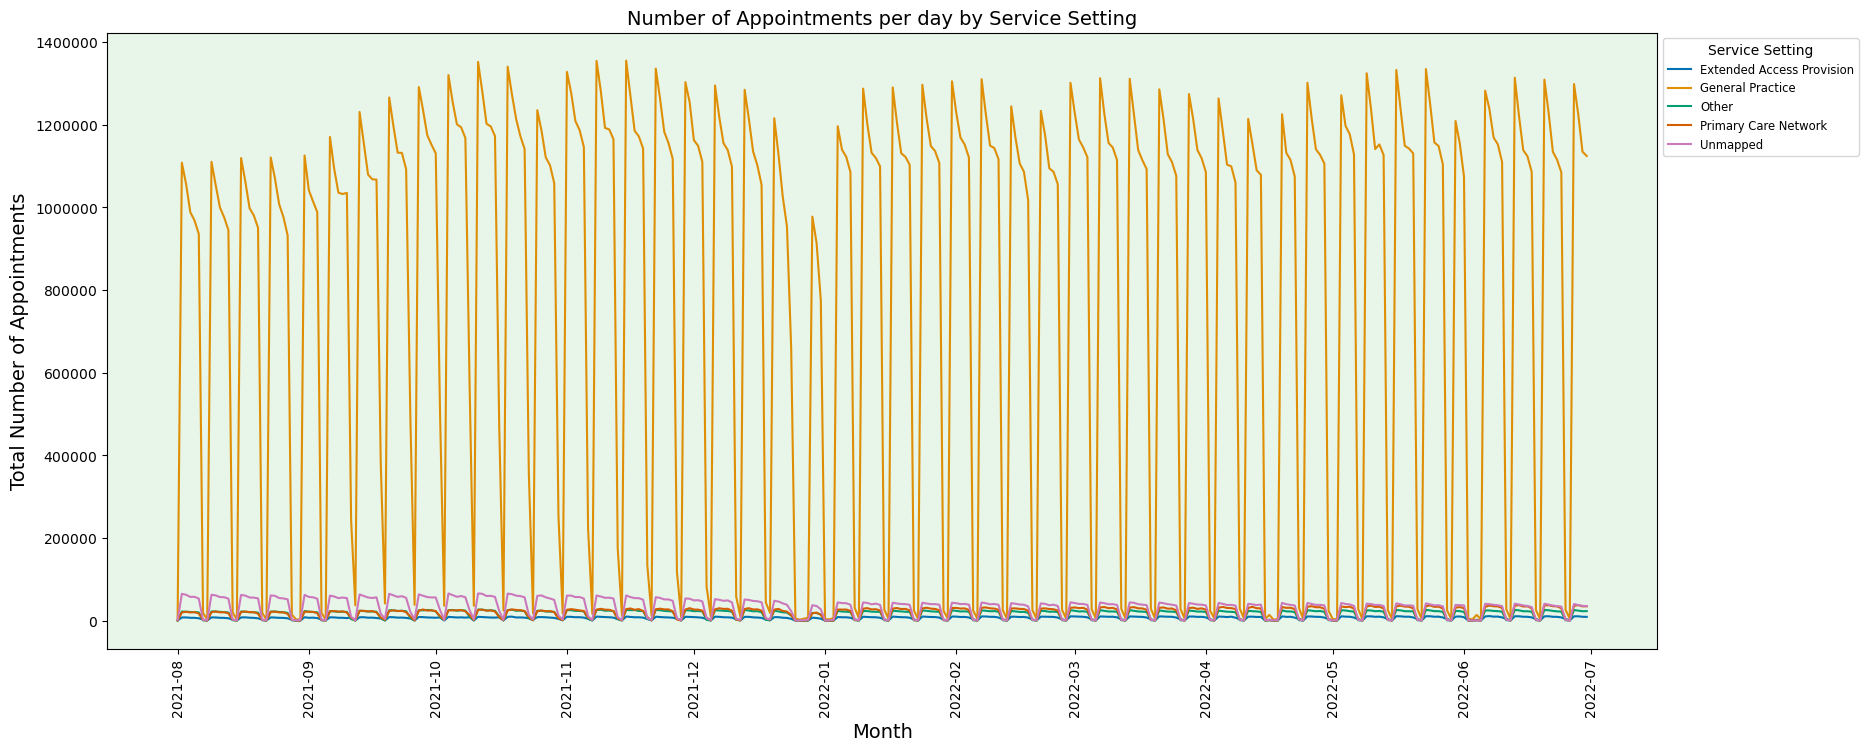

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import pandas as pd
import matplotlib.dates as mdates

# Ignore warnings.
import warnings
warnings.filterwarnings('ignore')

# Aggregate the appointments per day for service settings
nc_ss_daily = nc.groupby(['appointment_date', 'service_setting'])\
              ['count_of_appointments'].sum().reset_index()

# Define a color palette
palette = sns.color_palette("colorblind") 

plt.figure(figsize=(20,8))
sns.lineplot(x='appointment_date', y='count_of_appointments',
             hue='service_setting', data=nc_ss_daily, palette=palette, 
             errorbar=None)

# Set the background color of the plot area to a very light pastel green
# #E8F5E9' == Light pastel green
ax = plt.gca()
ax.set_facecolor('#E8F5E9')

plt.title('Number of Appointments per day by Service Setting',fontsize=14)
plt.xlabel('Month',fontsize=14)
plt.ylabel('Total Number of Appointments',fontsize=14)

plt.xticks(rotation=90)

# Adjust and reposition the legend
plt.legend(loc='upper left', bbox_to_anchor=(1, 1),
           title='Service Setting', fontsize='small')

# Use ScalarFormatter to format the y-axis
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
ax.ticklabel_format(style='plain', axis='y')

# Set major ticks format and locator for the x-axis to show every month
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Save the plot
# plt.savefig('x'.png')

# Show the plot
plt.show()


GP is the busiest service. Other settings contribute very little. It might be worth looking into those. December's dip could be from the Christmas/New Year holidays, and there's an obvious drop on weekends

**Closer look at the GP weekly data**

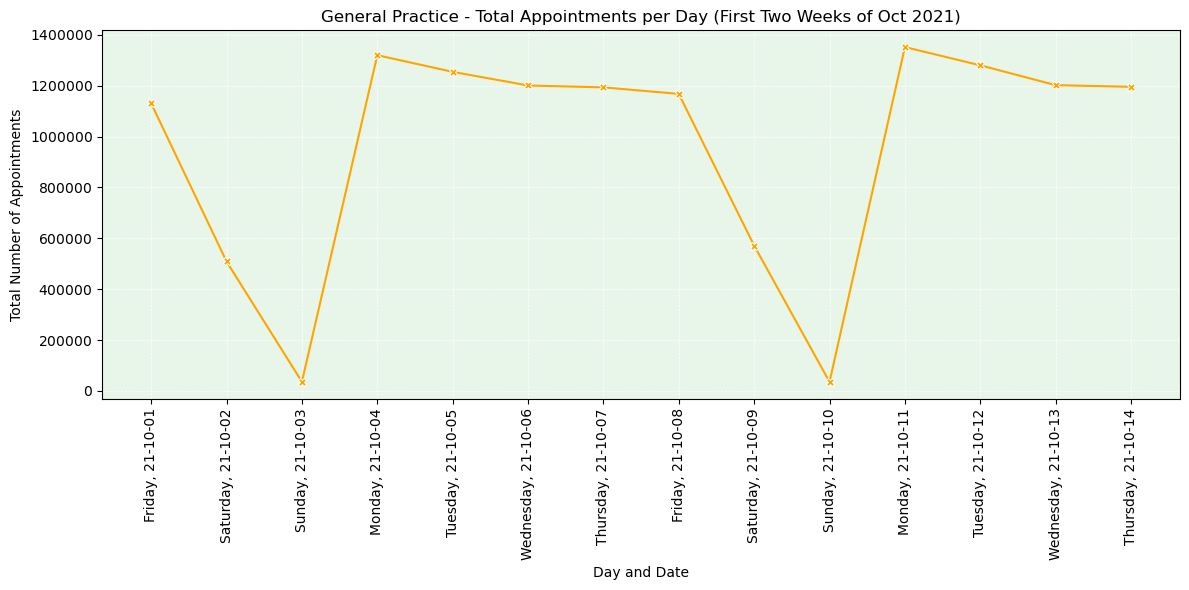

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# Add a new column for the day of the week and the date combined
nc_ss_daily['day_and_date'] = nc_ss_daily['appointment_date'].dt.strftime('%A, %y-%m-%d')

# Filter for General Practice service setting and the first two weeks of October 2021
start_date = '2021-10-01'
end_date = '2021-10-14'
filtered_data = nc_ss_daily[
    (nc_ss_daily['service_setting'] == 'General Practice') & 
    (nc_ss_daily['appointment_date'] >= start_date) & 
    (nc_ss_daily['appointment_date'] <= end_date)
]

# Create the plot
plt.figure(figsize=(12,6))
sns.lineplot(x='day_and_date', y='count_of_appointments', 
             data=filtered_data, marker='X', errorbar=None, color='orange')

# Set the background color of the plot area to a very light pastel green
# '#E8F5E9' ==Light pastel green
ax = plt.gca()
ax.set_facecolor('#E8F5E9')

# Enable grid lines
ax.grid(True, which='both', linestyle='--', linewidth=0.5, color='white')


plt.title('General Practice - Total Appointments per Day (First Two Weeks of Oct 2021)')
plt.xlabel('Day and Date')
plt.ylabel('Total Number of Appointments')

# Rotate the x-axis labels 
plt.xticks(rotation=90)

# Use ScalarFormatter to format the y-axis
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
ax.ticklabel_format(style='plain', axis='y')

# Tight layout for better spacing
plt.tight_layout()

# Save the plot with tight bounding box to avoid cutting off labels
plt.savefig('Weekly General Practice data .png', bbox_inches='tight')

# Show the plot
plt.show()



Steep drop in appointment count over the weekend– Almost no service on Sundays ? Monday is the busiest day of the week. Due to the weekend backlog for both GPs and patients it seems 

**nc data frame- Service settings: Total Monthly appointments**

In [ ]:
# Plot the appointments over the available date range, and review the service settings for months.
# Create a lineplot.

In [89]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the Excel file into a DataFrame
nc = pd.read_excel('national_categories.xlsx')

# Change the data type of appointment_month to string
nc['appointment_month'] = nc['appointment_month'].astype(str)

# Aggregate the appointments per month for service settings
nc_ss = nc.groupby(['appointment_month', 'service_setting'])\
        ['count_of_appointments'].sum().reset_index()

# View the new DataFrame
nc_ss.head()

,appointment_month,service_setting,count_of_appointments
0,2021-08,Extended Access Provision,160927
1,2021-08,General Practice,21575852
2,2021-08,Other,449101
3,2021-08,Primary Care Network,432448
4,2021-08,Unmapped,1233843


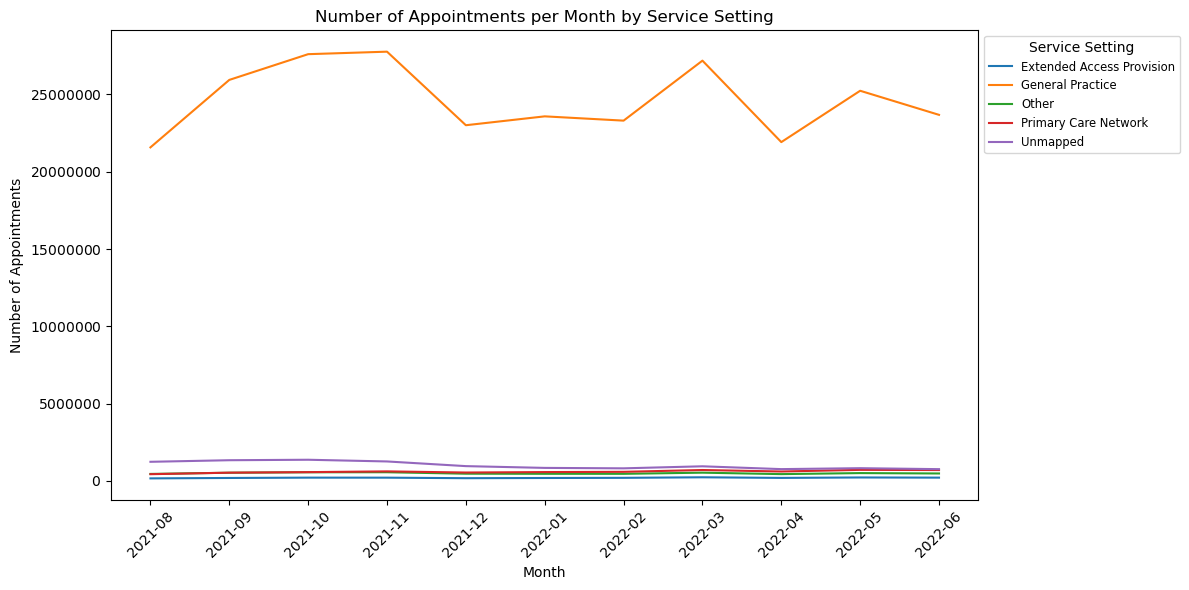

In [91]:
# Create a lineplot with Seaborn for nc_ss data set

import matplotlib.ticker as ticker

plt.figure(figsize=(12,6))
sns.lineplot(x='appointment_month', y='count_of_appointments', 
             hue='service_setting', data=nc_ss, errorbar=None)

plt.title('Number of Appointments per Month by Service Setting')
plt.xlabel('Month')
plt.ylabel('Number of Appointments')

plt.xticks(rotation=45)

# Adjust and reposition the legend
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), \
           title='Service Setting', fontsize='small')

# Use ScalarFormatter to format the y-axis
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
ax.ticklabel_format(style='plain', axis='y')

# Tight layout for better spacing
plt.tight_layout()

# Save the plot
plt.savefig('Appointments per Month by Service Settings _line plot_nc df .png')

# Show the plot
plt.show()


**nc data frame - Context types: Total monthly appointments**

In [ ]:
# Create a separate data set that can be used in future weeks. 
# Aggregate the appointments per month for context type
# View output.
# Plot the appointments over the available date range, and review the context types for months.
# Create a lineplot.

In [93]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the Excel file into a DataFrame
nc = pd.read_excel('national_categories.xlsx')

# Change the data type of appointment_month to string
nc['appointment_month'] = nc['appointment_month'].astype(str)

# Aggregate the appointments per month for context types
nc_ct = nc.groupby(['appointment_month','context_type'])\
        ['count_of_appointments'].sum().reset_index()

# View the new DataFrame
nc_ct.head()


,appointment_month,context_type,count_of_appointments
0,2021-08,Care Related Encounter,20255235
1,2021-08,Inconsistent Mapping,2363093
2,2021-08,Unmapped,1233843
3,2021-09,Care Related Encounter,24404251
4,2021-09,Inconsistent Mapping,2782135


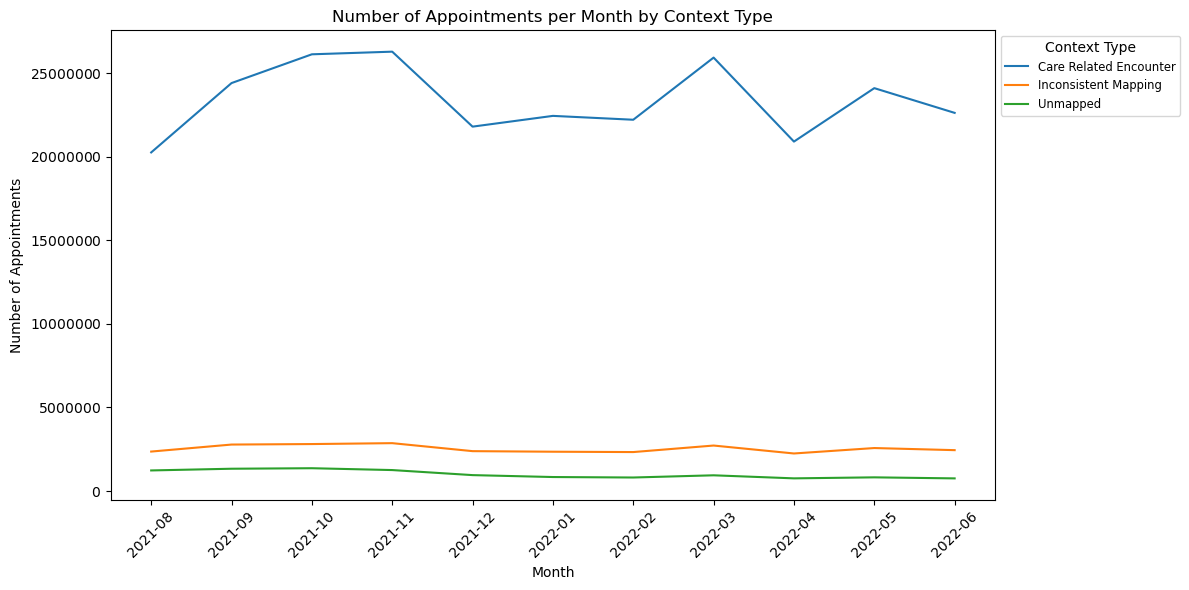

In [411]:
# Create a lineplot with Seaborn for nc_ct data set 


import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

plt.figure(figsize=(12, 6))
sns.lineplot(x='appointment_month', y='count_of_appointments', 
             hue='context_type', data=nc_ct, errorbar=None)
plt.title('Number of Appointments per Month by Context Type')
plt.xlabel('Month')
plt.ylabel('Number of Appointments')
plt.xticks(rotation=45)

# Adjust and reposition the legend
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Context Type', fontsize='small')

# Use ScalarFormatter to format the y-axis
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
ax.ticklabel_format(style='plain', axis='y')

# Tight layout for better spacing
plt.tight_layout()

# Save the plot
plt.savefig('nc_Number of Appointments per Month by Context Type_lineplot.png')

# Show the plot
plt.show()

**nc data frame - National categories: Total monthly appointments**

In [12]:
# Create a separate data set that can be used in future weeks. 
# View output.
# Plot the appointments over the available date range, and review the national categories for months.

import pandas as pd

# Read the Excel file into a DataFrame
nc = pd.read_excel('national_categories.xlsx')

# Change the data type of appointment_month to string
nc['appointment_month'] = nc['appointment_month'].astype(str)

# Aggregate the appointments per month for national categories
nc_nc = nc.groupby(['appointment_month', 'national_category'])['count_of_appointments'].sum().reset_index()

# View the new DataFrame
nc_nc.head()


,appointment_month,national_category,count_of_appointments
0,2021-08,Care Home Needs Assessment & Personalised Care...,29676
1,2021-08,Care Home Visit,47583
2,2021-08,Clinical Triage,3704207
3,2021-08,General Consultation Acute,4280920
4,2021-08,General Consultation Routine,7756045


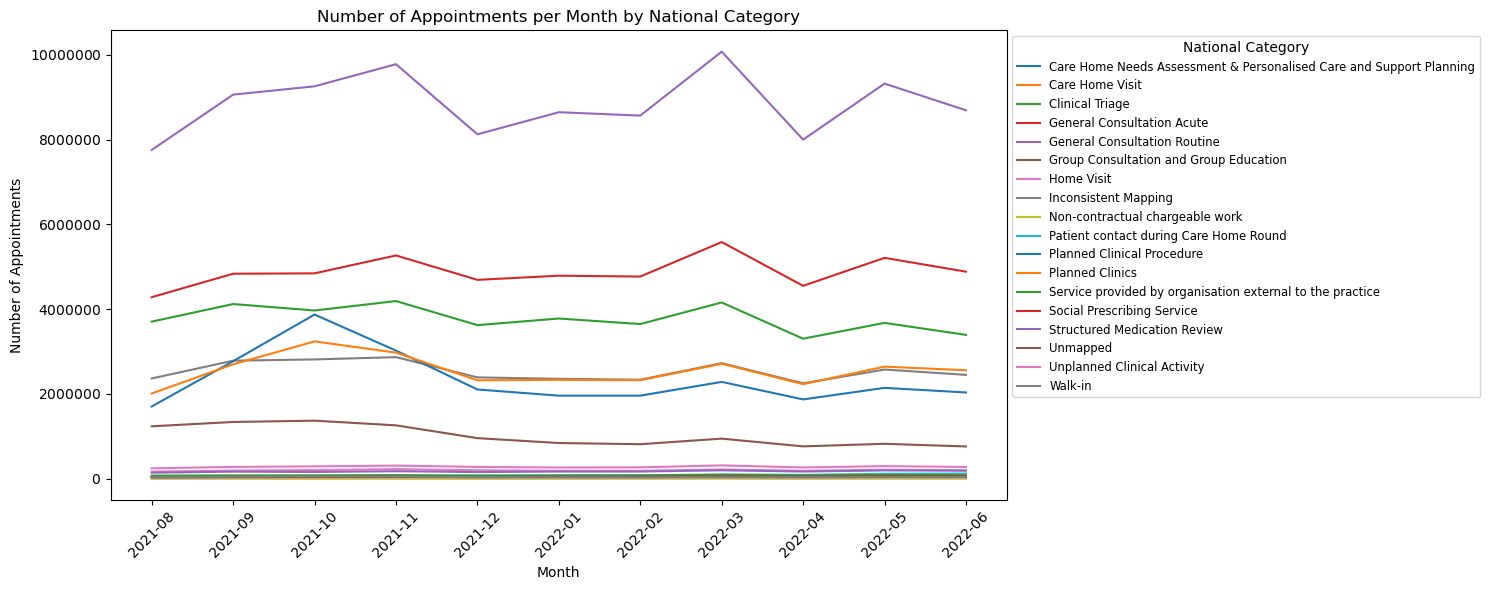

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# Ignore warnings.
import warnings
warnings.filterwarnings('ignore')

# Define a color palette
palette = sns.color_palette("tab10") 

# Create a lineplot with Seaborn
plt.figure(figsize=(15, 6))
sns.lineplot(x='appointment_month', y='count_of_appointments', 
             hue='national_category', data=nc_nc, errorbar=None,
             palette=palette)  

plt.title('Number of Appointments per Month by National Category')
plt.xlabel('Month')
plt.ylabel('Number of Appointments')
plt.xticks(rotation=45)

# Adjust and reposition the legend
plt.legend(loc='upper left', bbox_to_anchor=(1, 1),\
           title='National Category', fontsize='small')

# Use ScalarFormatter to format the y-axis
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
ax.ticklabel_format(style='plain', axis='y')

# Tight layout for better spacing
plt.tight_layout()

# Save the plot
plt.savefig('Appointments per Month by National Category_lineplot_nc df.png')

# Show the plot
plt.show()


Could’ve filtered out the Unplanned and Unmapped categories for clarity. Acute and Routine General consultations are the top two categories—putting more pressure on GPs?. Maybe Clinical Triaging could help prioritize certain appointments better?

### Objective 2
Create four visualisations indicating the number of appointments for service setting per season. 
The seasons are summer (June to August 2021), autumn (September to November 2021), winter (December to February 2022), 
and spring (March to May 2022).

**Summer (June to August 2021):**

In [107]:
# Create a separate data set that can be used in future weeks. 
# View output.

# Filter for Summer (June to August 2021)
summer_filter = ((nc['appointment_date'] >= '2021-06-01') \
                 & (nc['appointment_date'] <= '2021-08-31'))
summer_data = nc[summer_filter]

# Group by appointment_date, appointment_month, and service setting, then sum the count of appointments
nc_ss_summer = summer_data.groupby(['appointment_date','appointment_month',
                                    'service_setting']).agg({'count_of_appointments':'sum'}).reset_index()

# Calculate the total number of appointments for the entire season
total_appointments_summer = nc_ss_summer['count_of_appointments'].sum()

# Print the sum of the records per season
print(f"Sum of the appointments in Summer 2021 : {total_appointments_summer}")

# View the new DataFrame
nc_ss_summer.head()


Sum of the appointments in Summer 2021 : 23852171


,appointment_date,appointment_month,service_setting,count_of_appointments
0,2021-08-01,2021-08,Extended Access Provision,438
1,2021-08-01,2021-08,General Practice,3411
2,2021-08-01,2021-08,Other,401
3,2021-08-01,2021-08,Primary Care Network,323
4,2021-08-01,2021-08,Unmapped,1054


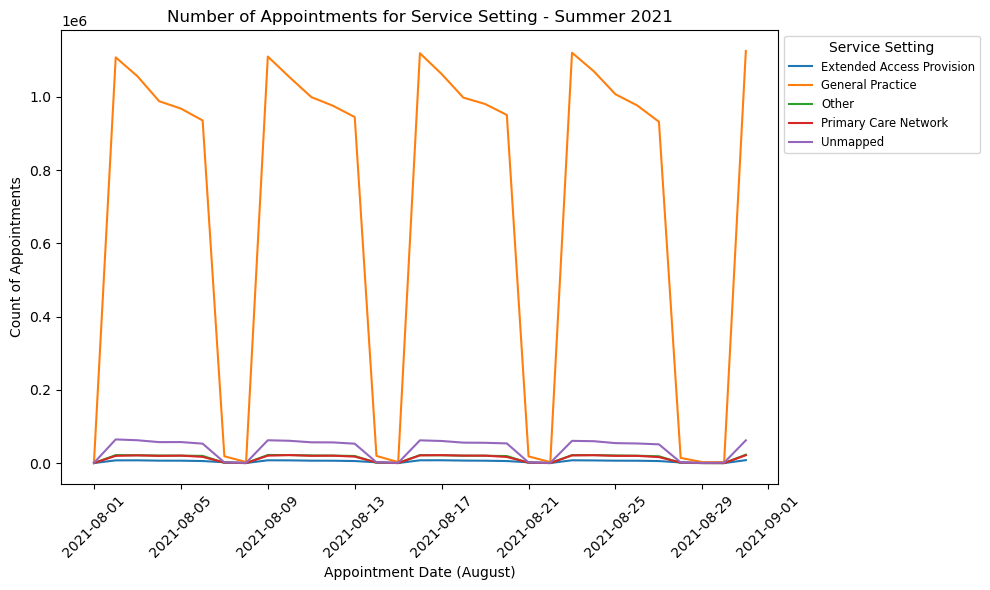

In [105]:
# Create a line plot for Summer
# No data provided for entire June and July 2021

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filter for Summer (June to August 2021)
summer_filter = ((nc['appointment_date'] >= '2021-06-01')\
                 & (nc['appointment_date'] <= '2021-08-31'))
summer_data = nc[summer_filter]

# Create the lineplot
plt.figure(figsize=(10, 6))
sns.lineplot(
    data= nc_ss_summer ,
    x= 'appointment_date', 
    y= 'count_of_appointments',
    hue='service_setting',
    errorbar=None
)

plt.title('Number of Appointments for Service Setting - Summer 2021')
plt.xlabel('Appointment Date (August)')
plt.ylabel('Count of Appointments')
plt.xticks(rotation=45)
plt.legend(title='Service Setting')

# Adjust and reposition the legend
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), 
           title='Service Setting', fontsize='small')
plt.tight_layout()

# save the plot
# plt.savefig('summer ss_line_plot.png')

plt.show()


**Autumn (September to November 2021):**

In [111]:
# Filter for Autumn (September to November 2021)
autumn_filter = (nc['appointment_date'] >= '2021-09-01') & \
                (nc['appointment_date'] <= '2021-11-30')
autumn_data = nc[autumn_filter]

# Group by appointment_date, month and service setting, then sum the count of appointments
nc_ss_autumn = autumn_data.groupby(['appointment_date','appointment_month',
                                    'service_setting']).agg({'count_of_appointments': 'sum'}).reset_index()

# Calculate the total number of appointments for the entire season
total_appointments_autumn = nc_ss_autumn['count_of_appointments'].sum()

# Print the sum of the records per season
print(f"Sum of the appointments in Autumn 2021 : {total_appointments_autumn}")

#View the new Autumn DataFrame
nc_ss_autumn.head()


Sum of the appointments in Autumn 2021 : 89231405


,appointment_date,appointment_month,service_setting,count_of_appointments
0,2021-09-01,2021-09,Extended Access Provision,6916
1,2021-09-01,2021-09,General Practice,1041879
2,2021-09-01,2021-09,Other,21796
3,2021-09-01,2021-09,Primary Care Network,21371
4,2021-09-01,2021-09,Unmapped,57423


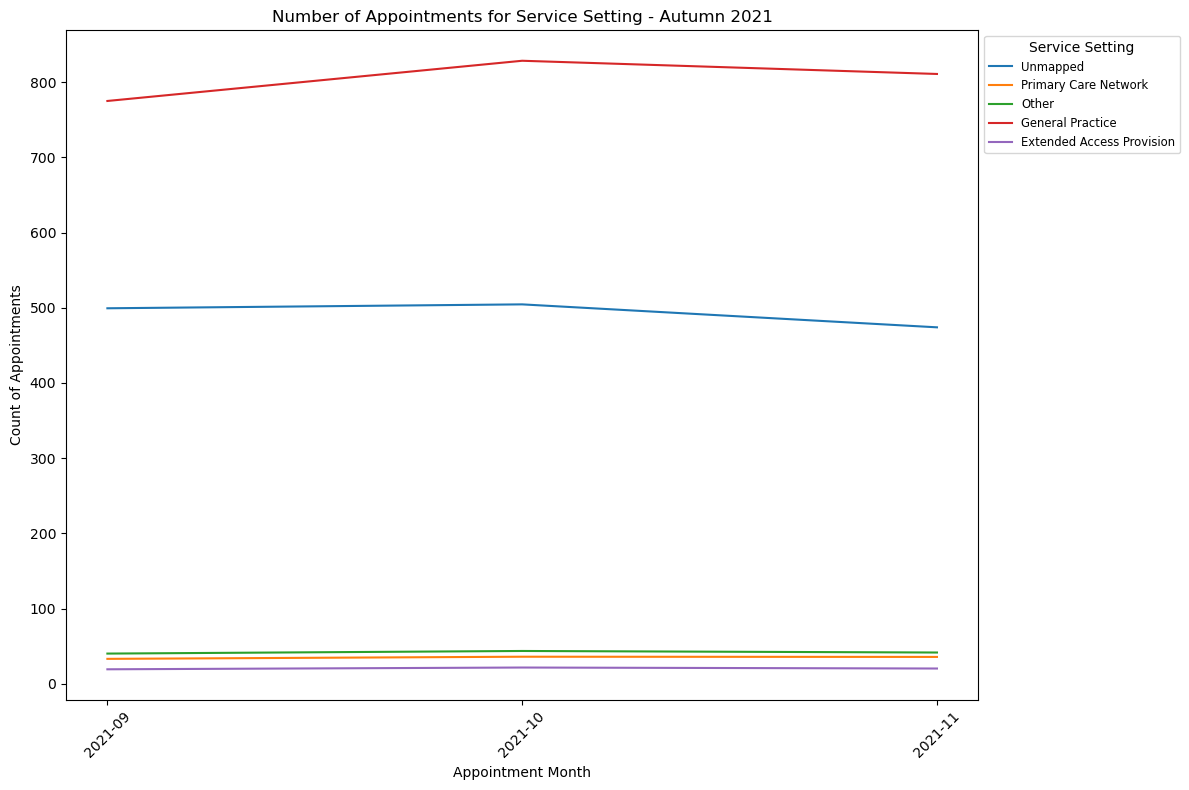

In [127]:
# Create a line plot for Autumn

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Filter for Autumn (September to November 2021)
autumn_filter = (nc['appointment_date'] >= '2021-09-01') &\
                (nc['appointment_date'] <= '2021-11-30')
autumn_data = nc[autumn_filter]

# Create the lineplot
plt.figure(figsize=(12,8))
sns.lineplot(
    data= autumn_data, 
    x='appointment_month', 
    y='count_of_appointments', 
    hue='service_setting', 
    errorbar=None
)

plt.title('Number of Appointments for Service Setting - Autumn 2021')
plt.xlabel('Appointment Month')
plt.ylabel('Count of Appointments')
plt.xticks(rotation=45)

# save the plot
# plt.savefig('Autumn ss_line_plot.png')

# Adjust and reposition the legend
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), 
           title='Service Setting', fontsize='small')
plt.tight_layout()

plt.show()


**Winter (December to February 2022):**

In [115]:
# Create a separate data set that can be used in future weeks. 
# View output.

# Filter for Winter (December 2021 to February 2022)
winter_filter = ((nc['appointment_date'] >= '2021-12-01') & \
                 (nc['appointment_date'] <= '2022-02-28'))
winter_data = nc[winter_filter]

# Group by appointment_date, month and service setting, then sum the count of appointments
nc_ss_winter = winter_data.groupby(['appointment_date','appointment_month', 
                                    'service_setting']).agg({'count_of_appointments': 'sum'}).reset_index()

# Calculate the total number of appointments for the entire season
total_appointments_winter = nc_ss_winter['count_of_appointments'].sum()

# Print the sum of the records per season
print(f"Sum of the appointments in Winter 2021/2022 : {total_appointments_winter}")

# View the new DataFrame
nc_ss_winter


Sum of the appointments in Winter 2021/2022 : 76131510


,appointment_date,appointment_month,service_setting,count_of_appointments
0,2021-12-01,2021-12,Extended Access Provision,8500
1,2021-12-01,2021-12,General Practice,1162676
2,2021-12-01,2021-12,Other,22924
3,2021-12-01,2021-12,Primary Care Network,26887
4,2021-12-01,2021-12,Unmapped,49064
...,...,...,...,...
445,2022-02-28,2022-02,Extended Access Provision,10538
446,2022-02-28,2022-02,General Practice,1301433
447,2022-02-28,2022-02,Other,25280
448,2022-02-28,2022-02,Primary Care Network,30966


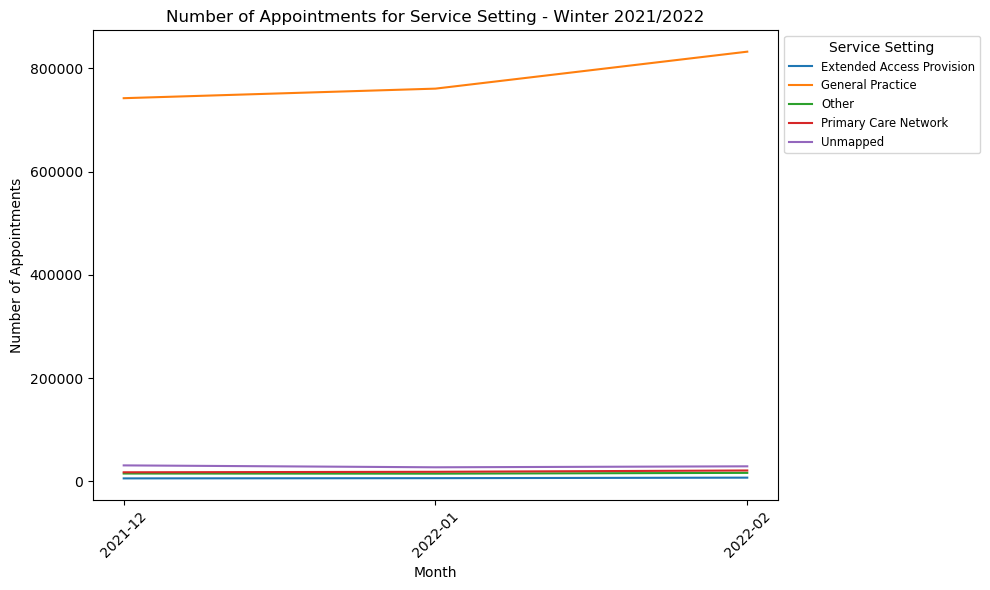

In [117]:
# Create a line plot for Winter
import seaborn as sns
import matplotlib.pyplot as plt

# Filter for Winter (December 2021 to February 2022)
winter_filter = ((nc['appointment_date'] >= '2021-12-01') &\
                 (nc['appointment_date'] <= '2022-02-28'))
winter_data = nc[winter_filter]

# Create the lineplot
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=nc_ss_winter,
    x='appointment_month', 
    y='count_of_appointments', 
    hue='service_setting',
    errorbar=None
)
plt.title('Number of Appointments for Service Setting - Winter 2021/2022')
plt.xlabel('Month')
plt.ylabel('Number of Appointments')
plt.xticks(rotation=45)

# Adjust and reposition the legend
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), 
           title='Service Setting', fontsize='small')
plt.tight_layout()

# save the plot
# plt.savefig('Winter ss_line_plot.png')

plt.show()

**Spring (March to May 2022):**

In [121]:
# Create a separate data set that can be used in future weeks. 
# View output.

# Filter for Spring (March to May 2022)
spring_filter = (nc['appointment_date'] >= '2022-03-01') &\
                (nc['appointment_date'] <= '2022-05-31')
spring_data = nc[spring_filter ]

# Group by appointment_date,month and service setting, then sum the count of appointments
nc_ss_spring = spring_data.groupby(['appointment_date','appointment_month', 
                                    'service_setting']).agg({'count_of_appointments': 'sum'}).reset_index()


# Calculate the total number of appointments for the entire season
total_appointments_spring = nc_ss_spring['count_of_appointments'].sum()

# Print the sum of the records per season
print(f"Sum of the appointments in Spring 2022 : {total_appointments_spring}")

# View the new DataFrame
nc_ss_spring.head()


Sum of the appointments in Spring 2022 : 81003606


,appointment_date,appointment_month,service_setting,count_of_appointments
0,2022-03-01,2022-03,Extended Access Provision,10082
1,2022-03-01,2022-03,General Practice,1229045
2,2022-03-01,2022-03,Other,23986
3,2022-03-01,2022-03,Primary Care Network,32070
4,2022-03-01,2022-03,Unmapped,42682


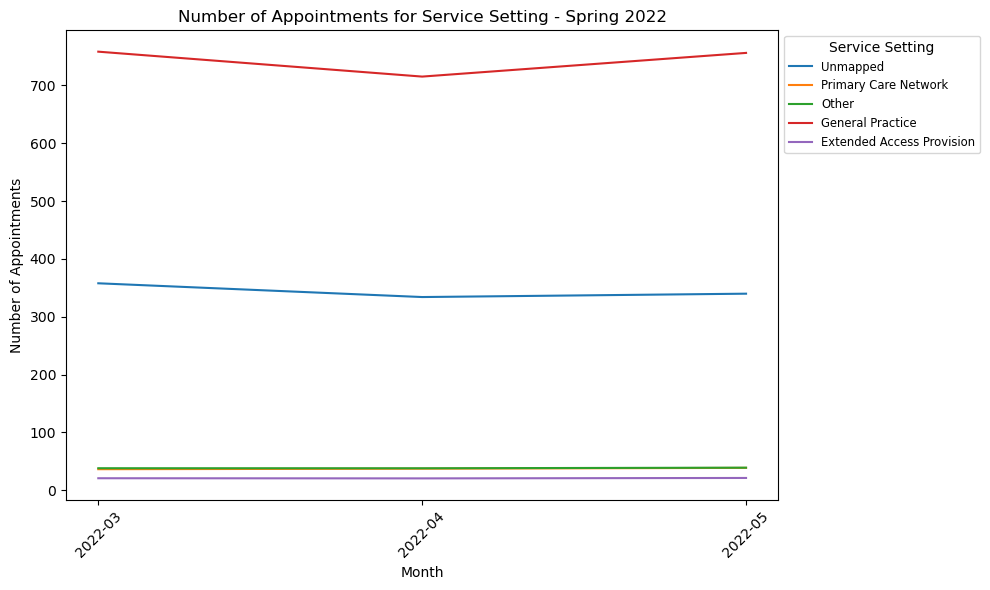

In [123]:
# Create a line plot for Spring
import seaborn as sns
import matplotlib.pyplot as plt

# Filter for Spring (March to May 2022)
spring_filter = (nc['appointment_date'] >= '2022-03-01') & \
                (nc['appointment_date'] <= '2022-05-31')
spring_data = nc[spring_filter]

plt.figure(figsize=(10, 6))
sns.lineplot(
    data= spring_data,
    x='appointment_month', 
    y='count_of_appointments', 
    hue='service_setting',
    errorbar=None
)

plt.title('Number of Appointments for Service Setting - Spring 2022')
plt.xlabel('Month')
plt.ylabel('Number of Appointments')
plt.xticks(rotation=45)

# Adjust and reposition the legend
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), 
           title='Service Setting', fontsize='small')
plt.tight_layout()

# save the plot
# plt.savefig('Spring ss_line_plot.png')

plt.show()

In [125]:
# Combine all the aggregated sum  data
nc_ss_sum = pd.concat([nc_ss_summer,nc_ss_autumn, nc_ss_winter,nc_ss_spring,])

# View data frame
nc_ss_sum

,appointment_date,appointment_month,service_setting,count_of_appointments
0,2021-08-01,2021-08,Extended Access Provision,438
1,2021-08-01,2021-08,General Practice,3411
2,2021-08-01,2021-08,Other,401
3,2021-08-01,2021-08,Primary Care Network,323
4,2021-08-01,2021-08,Unmapped,1054
...,...,...,...,...
455,2022-05-31,2022-05,Extended Access Provision,10165
456,2022-05-31,2022-05,General Practice,1154859
457,2022-05-31,2022-05,Other,23079
458,2022-05-31,2022-05,Primary Care Network,32851


In [145]:
# Import and sense-check the national_categories.xlsx data set as nc.
import pandas as pd

# Import the national_categories.xlsx data set as nc.
nc = pd.read_excel('national_categories.xlsx')

# Sense-check by summing the count_of_appointments column.
total_count = nc['count_of_appointments'].sum()

print(total_count)

296046770


**Sesonal GP appointmemts - nc df- 10 months period**

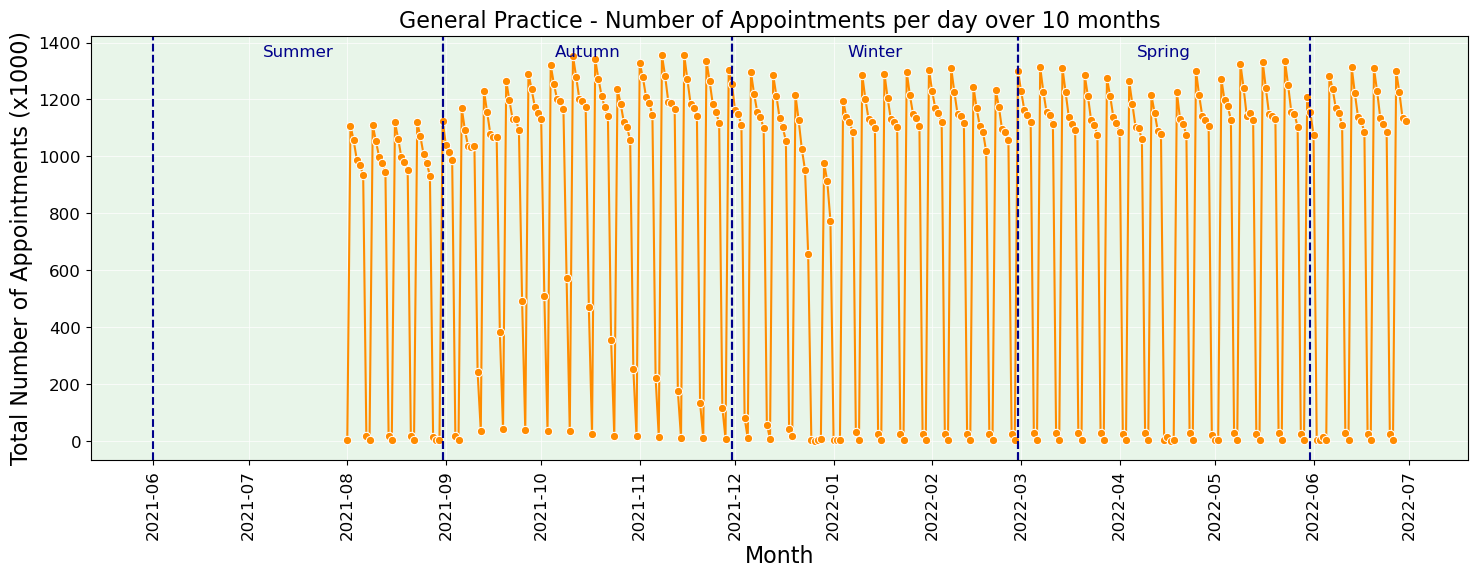

In [127]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import pandas as pd
import matplotlib.dates as mdates

# Read the Excel file into a DataFrame
nc = pd.read_excel('national_categories.xlsx')

# Aggregate the appointments per day for service settings
nc_ss_daily = nc.groupby(['appointment_date', 'service_setting'])\
              ['count_of_appointments'].sum().reset_index()

# Filter Gp parctice service setting
nc_ss_daily_filtered = nc_ss_daily[nc_ss_daily['service_setting'] == 'General Practice']

# Create the plot
plt.figure(figsize=(15, 6))
sns.lineplot(x='appointment_date', 
             y=nc_ss_daily_filtered['count_of_appointments'] / 1000, 
             data=nc_ss_daily_filtered, 
             color='darkorange', 
             marker='o', 
             errorbar=None)

# Set the background color of the plot area to a very light pastel green
ax = plt.gca()
ax.set_facecolor('#E8F5E9') 

# Customise the grid
ax.grid(True) 
ax.grid(color='white', linestyle='-', linewidth=0.5)  

plt.title('General Practice - Number of Appointments per day over 10 months', fontsize=16)
plt.xlabel('Month', fontsize=16)
plt.ylabel('Total Number of Appointments (x1000)', fontsize=16) 

# Set font size for x and y axis ticks
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)

# Set major ticks format and locator for the x-axis to show every month
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Define the start and end dates of each season 
seasons = {
    'Summer': ('2021-06-01', '2021-08-31'),
    'Autumn': ('2021-08-31', '2021-11-30'),
    'Winter': ('2021-11-30', '2022-02-28'),
    'Spring': ('2022-02-28', '2022-05-31')
}

# Add vertical lines and labels for each season
for season, (start_date, end_date) in seasons.items():
    start = pd.to_datetime(start_date)
    end = pd.to_datetime(end_date)
    mid = start + (end - start) / 2
    ax.axvline(start, color='darkblue', linestyle='--')
    ax.axvline(end, color='darkblue', linestyle='--')
    plt.text(mid, ax.get_ylim()[1] * 0.95, season, 
             horizontalalignment='center', fontsize=12, color='darkblue')

# Tight layout 
plt.tight_layout(pad=1.5)

# Save the plot with bbox_inches to avoid cropping
plt.savefig('Seasonal GP appoitments lineplot.png', bbox_inches='tight')

# Show the plot
plt.show()


Decided to check out the seasonal pattern in one plot, with seasons labeled, focusing just on GP workload. There’s an obvious seasonal peak, but GPs are busy all year round

### Analyse tweets from Twitter with hashtags related to healthcare in the UK.

In [117]:
# Libraries and settings needed for analysis
import pandas as pd
import seaborn as sns

# Set figure size.
sns.set(rc={'figure.figsize':(15, 12)})

# Set the plot style as white.
# sns.set_style('white')

# Maximum column width to display
pd.options.display.max_colwidth = 200

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns

# Load the data set.
tweets= pd.read_csv('tweets.csv')

# View the DataFrame.
tweets.head()

,tweet_id,tweet_full_text,tweet_entities,tweet_entities_hashtags,tweet_metadata,tweet_retweet_count,tweet_favorite_count,tweet_favorited,tweet_retweeted,tweet_lang
0,1567629223795527681,As Arkansas’ first Comprehensive Stroke Certif...,"{'hashtags': [{'text': 'Healthcare', 'indices'...",#Healthcare,"{'iso_language_code': 'en', 'result_type': 're...",0,0,False,False,en
1,1567582846612553728,RT @AndreaGrammer: Work-life balance is at the...,"{'hashtags': [{'text': 'PremiseHealth', 'indic...","#PremiseHealth, #hiring","{'iso_language_code': 'en', 'result_type': 're...",2,0,False,False,en
2,1567582787070304256,RT @OntarioGreens: $10 billion can go a long w...,"{'hashtags': [{'text': 'Healthcare', 'indices'...",#Healthcare,"{'iso_language_code': 'en', 'result_type': 're...",39,0,False,False,en
3,1567582767625428992,RT @modrnhealthcr: 🚨#NEW:🚨 Insurance companies...,"{'hashtags': [{'text': 'NEW', 'indices': [20, ...",#NEW,"{'iso_language_code': 'en', 'result_type': 're...",5,0,False,False,en
4,1567582720460570625,ICYMI: Our recent blogs on Cybersecurity in Ac...,"{'hashtags': [{'text': 'blogs', 'indices': [18...","#blogs, #digitaltransformation, #cybersecurity...","{'iso_language_code': 'en', 'result_type': 're...",0,0,False,False,en


In [131]:
# Explore the metadata.
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1174 entries, 0 to 1173
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   tweet_id                 1174 non-null   int64 
 1   tweet_full_text          1174 non-null   object
 2   tweet_entities           1174 non-null   object
 3   tweet_entities_hashtags  1007 non-null   object
 4   tweet_metadata           1174 non-null   object
 5   tweet_retweet_count      1174 non-null   int64 
 6   tweet_favorite_count     1174 non-null   int64 
 7   tweet_favorited          1174 non-null   bool  
 8   tweet_retweeted          1174 non-null   bool  
 9   tweet_lang               1174 non-null   object
dtypes: bool(2), int64(3), object(5)
memory usage: 75.8+ KB


**Tweets Stats**

In [133]:
# Explore the data set.
tweets_exclude_id = tweets.drop(columns=['tweet_id'])

tweets_exclude_id.describe().round(2)


,tweet_retweet_count,tweet_favorite_count
count,1174.00,1174.00
mean,8.63,0.37
std,29.78,2.04
min,0.00,0.00
25%,0.00,0.00
50%,1.00,0.00
75%,3.00,0.00
max,303.00,42.00


In [135]:
# List all the column names in ad df(to avoid typos later)
tweets_columns= tweets.columns.tolist()
tweets_columns

['tweet_id',
 'tweet_full_text',
 'tweet_entities',
 'tweet_entities_hashtags',
 'tweet_metadata',
 'tweet_retweet_count',
 'tweet_favorite_count',
 'tweet_favorited',
 'tweet_retweeted',
 'tweet_lang']

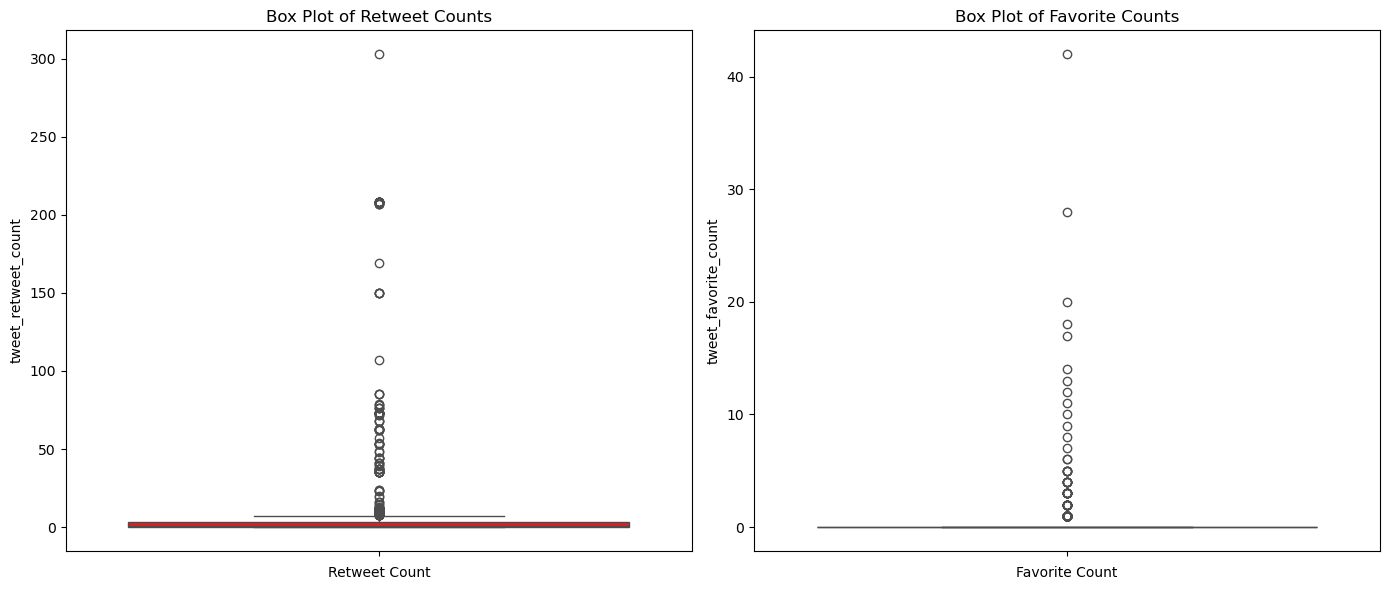

In [137]:
# Would it be useful to only look at retweeted and favourite tweet messages?
# Explain your answer.

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))

# Box plot for retweet counts
plt.subplot(1, 2, 1)
sns.boxplot(y=tweets['tweet_retweet_count'], color='red')
plt.title('Box Plot of Retweet Counts')
plt.xlabel('Retweet Count')

# Box plot for favorite counts
plt.subplot(1, 2, 2)
sns.boxplot(y=tweets['tweet_favorite_count'], color='yellow')
plt.title('Box Plot of Favorite Counts')
plt.xlabel('Favorite Count')

# Save the plot to a file
plt.savefig('tweets_stats_box_plots.png', format='png', dpi=300)

plt.tight_layout()
plt.show()



Both retweets and favorites are highly skewed, with means way higher than medians, indicating outliers or a few tweets with really high engagement. For both, the Q1 and median values are 0, meaning at least 50% of tweets get no engagement. Seems like a lot of tweets get little to no interaction

Finding the Top 5 Most Retweeted Tweets

In [139]:
#Top 5 Most Retweeted Tweets
top_5_retweeted = tweets.sort_values(by='tweet_retweet_count', ascending=False).head(5)
print("Top 5 Most Retweeted Tweets:")
top_5_retweeted[['tweet_id', 'tweet_full_text', 'tweet_retweet_count']]

Top 5 Most Retweeted Tweets:


,tweet_id,tweet_full_text,tweet_retweet_count
263,1567649792897032192,RT @UltimaLionsDen: Temitope is looking to boo...,303
1139,1567585317498003456,"RT @khaleejtimes: .@BurjeelHoldings, a private...",208
985,1567594301978288130,"RT @khaleejtimes: .@BurjeelHoldings, a private...",208
330,1567644141726703617,"RT @khaleejtimes: .@BurjeelHoldings, a private...",208
595,1567621342987718656,"RT @khaleejtimes: .@BurjeelHoldings, a private...",208


Finding the Top 5 Most Favourited Tweets

In [141]:
#Top 5 Most Favourited Tweets
top_5_favorited = tweets.sort_values(by='tweet_favorite_count', ascending=False).head(5)
print("Top 5 Most Favourited Tweets:")
top_5_favorited[['tweet_id', 'tweet_full_text', 'tweet_favorite_count']]

Top 5 Most Favourited Tweets:


,tweet_id,tweet_full_text,tweet_favorite_count
1156,1567583855422611461,Lipid-Lowering Drugs\n\n#TipsForNewDocs #MedEd...,42
9,1567582427719282689,You ready for $JCO @_JennyCo ❤️\n\n#Healthcare...,28
442,1567634936341069826,How health insurance works 😂 \n\n#comedy #adul...,20
84,1567579049043832832,Our nat’l choices re: #healthcare systems aren...,18
1122,1567586306607423488,"Heart Failure, Myocardial Infarction &amp; imm...",17


Finding the Bottom 5 least Retweeted and favourited  Tweets

In [143]:
# Find the bottom 10 least retweeted tweets
bottom_5_retweeted = tweets.sort_values(by='tweet_retweet_count', ascending=True).head(10)
print("Bottom 5 Least Retweeted Tweets:")
bottom_5_retweeted[['tweet_id', 'tweet_full_text', 'tweet_retweet_count']]


Bottom 5 Least Retweeted Tweets:


,tweet_id,tweet_full_text,tweet_retweet_count
0,1567629223795527681,As Arkansas’ first Comprehensive Stroke Certif...,0
640,1567619005413736448,At-home healthcare is a GAME 👏 CHANGER 👏\n\n#h...,0
641,1567618998509993984,📣Healthcare is on the brink of many seismic sh...,0
642,1567618996333068290,Night-shift nurses frequently miss out on bene...,0
643,1567618969510502407,What changes have #healthcare systems gone thr...,0
644,1567618964523552770,#Cyberhacking of health records is reaching an...,0
645,1567618951642861569,The Importance of Pharmaceutical Competitor An...,0
647,1567618838941810689,10 cybersecurity tips for medical device devel...,0
648,1567618812047941632,What is functional medicine? #TeamNeedham #pod...,0
650,1567618716874981377,Remote Instrument Care Opens Up Space and Oppo...,0


In [145]:
# Find the bottom 10 least favourited tweets
bottom_5_favorited = tweets.sort_values(by='tweet_favorite_count', ascending=True).head(10)
print("Bottom 5 Least Favourited Tweets:")
bottom_5_favorited[['tweet_id', 'tweet_full_text', 'tweet_favorite_count']]

Bottom 5 Least Favourited Tweets:


,tweet_id,tweet_full_text,tweet_favorite_count
0,1567629223795527681,As Arkansas’ first Comprehensive Stroke Certif...,0
728,1567613443360051201,RT @_timos_: Cour Pharmaceuticals raises $30 m...,0
729,1567613341333622789,"Apple’s Far Out event: Watch Series 8, Ultra &...",0
730,1567613330969481216,How to use the Body Response metric on Fitbit ...,0
731,1567613320013959168,Cour Pharmaceuticals raises $30 million - Crai...,0
732,1567613057458917377,"@PierrePoilievre Sir, with respect, but how do...",0
733,1567613032745820165,RT @jnasr: Looking forward to speaking at #Con...,0
734,1567613030640263171,RT @agnessarolta: It was a great honour to pro...,0
735,1567613022331346945,RT @aromerollyc: We are launching What's Up He...,0
736,1567613013506637826,"Despite a volatile market, @lightspeedvp remai...",0


**Review of Hashtags**

In [24]:
# Create a new DataFrame containing only the text.
# View the DataFrame.
tweets_text = tweets[['tweet_full_text']]
print(tweets_text.head())

                                     tweet_full_text
0  As Arkansas’ first Comprehensive Stroke Certif...
1  RT @AndreaGrammer: Work-life balance is at the...
2  RT @OntarioGreens: $10 billion can go a long w...
3  RT @modrnhealthcr: 🚨#NEW:🚨 Insurance companies...
4  ICYMI: Our recent blogs on Cybersecurity in Ac...


In [26]:
# Loop through the messages, and create a list of values containing the # symbol.

# Create a variable 'tags', and assign an empty list to it
tags = []

# Use a for loop to iterate through the text and extract hashtags
for y in [x.split(' ') for x in tweets_text['tweet_full_text'].values]:
    for z in y:
        if '#' in z:
            # Change to lowercase
            tags.append(z.lower())

# Create a Series to count the values in the list
tags_series = pd.Series(tags).value_counts()

In [28]:
# Display the first 10 records.
tags_series.head(10)

#healthcare        716
#health             80
#medicine           41
#ai                 40
#job                38
#medical            35
#strategy           30
#pharmaceutical     28
#digitalhealth      25
#pharma             25
Name: count, dtype: int64

In [30]:
# Convert the series to a DataFrame 
# Rename the columns.

# Convert the tags_series to a DataFrame
tags_df = tags_series.reset_index()

# Rename the columns
tags_df.columns = ['hashtag', 'count']

# View the resulting DataFrame
tags_df.head()

,hashtag,count
0,#healthcare,716
1,#health,80
2,#medicine,41
3,#ai,40
4,#job,38


In [32]:
# Sense-check the DataFrame
print(tags_df.info())
print(tags_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1754 entries, 0 to 1753
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   hashtag  1754 non-null   object
 1   count    1754 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 27.5+ KB
None
       hashtag  count
0  #healthcare    716
1      #health     80
2    #medicine     41
3          #ai     40
4         #job     38


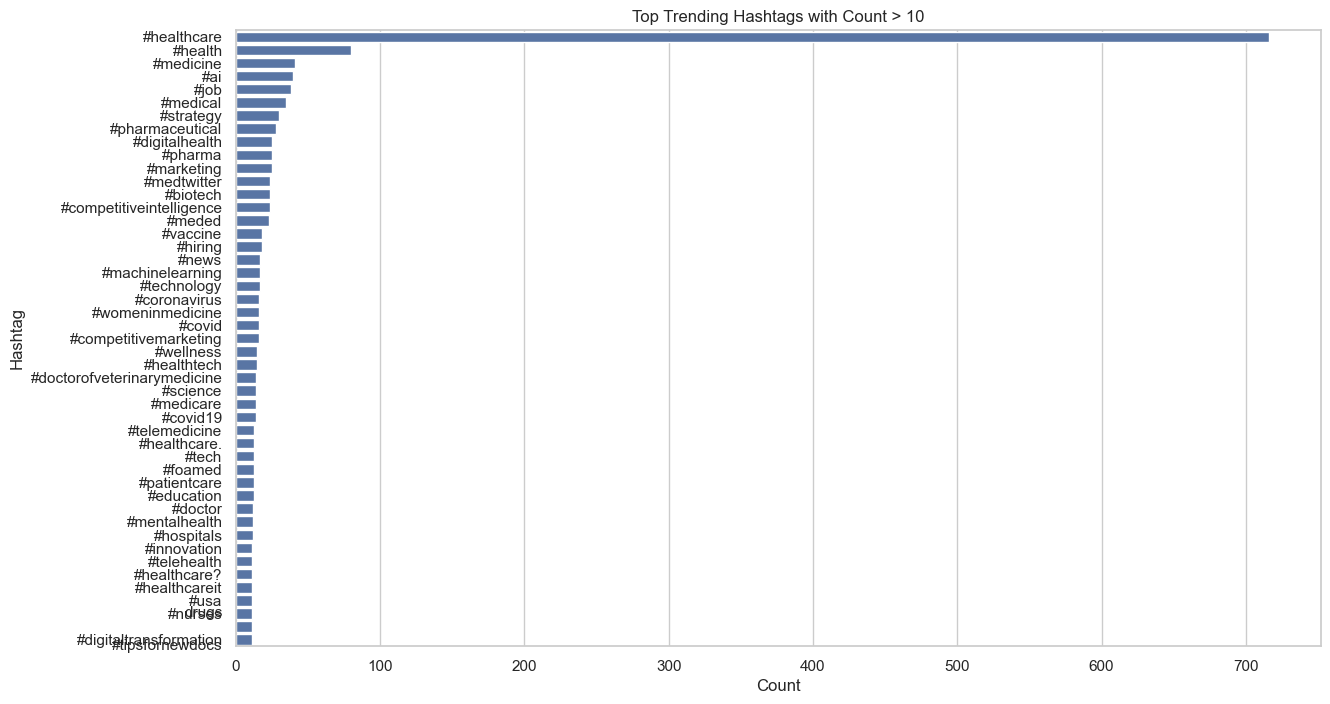

In [34]:
# Create a Seaborn barplot of all records with a count > 10

sns.set(style="whitegrid")
plt.figure(figsize=(14, 8))

sns.barplot(x='count', y='hashtag', data=tags_df[tags_df['count'] > 10])
plt.title('Top Trending Hashtags with Count > 10')

plt.xlabel('Count')
plt.ylabel('Hashtag')
plt.show()


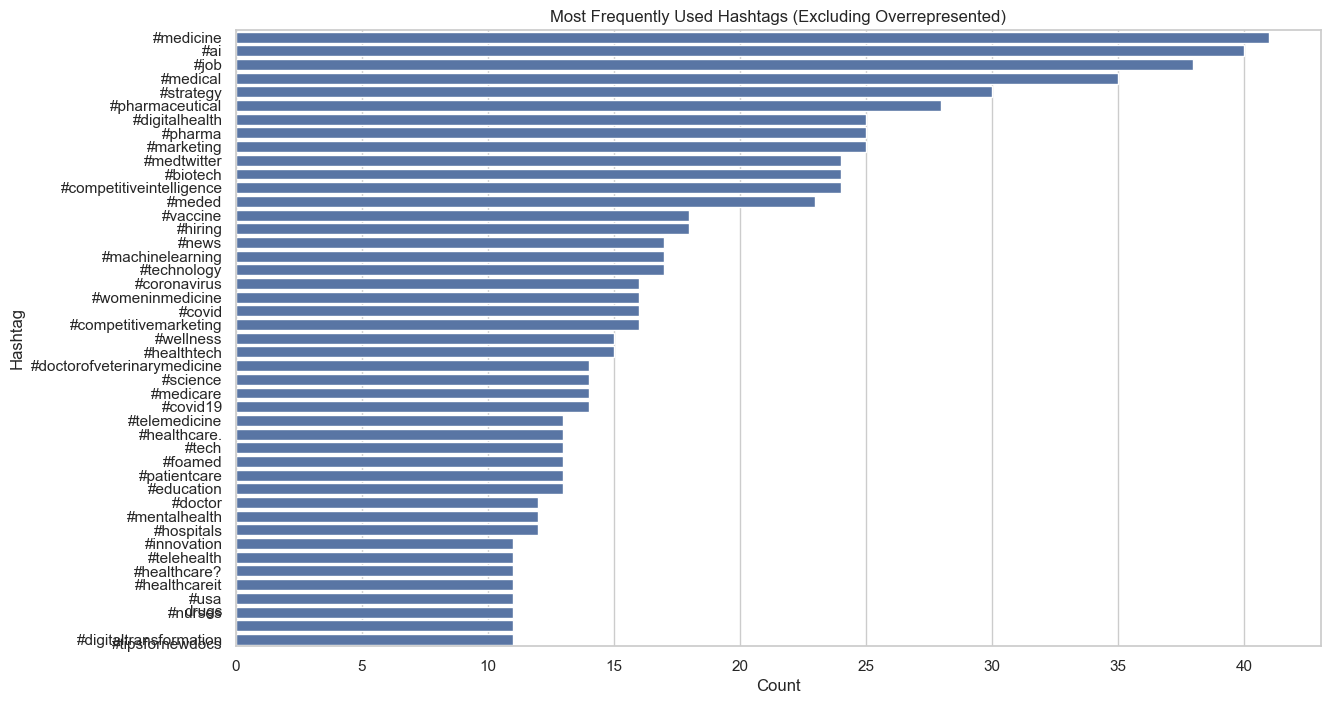

In [36]:
# Remove overrepresented hashtags and create another barplot
# Assume 'overrepresented' means count > 50

filtered_tags_df = tags_df[tags_df['count'] <= 50]

plt.figure(figsize=(14, 8))
sns.barplot(x='count', y='hashtag', 
            data=filtered_tags_df[filtered_tags_df['count'] > 10])

plt.title('Most Frequently Used Hashtags (Excluding Overrepresented)')
plt.xlabel('Count')
plt.ylabel('Hashtag')

plt.show()


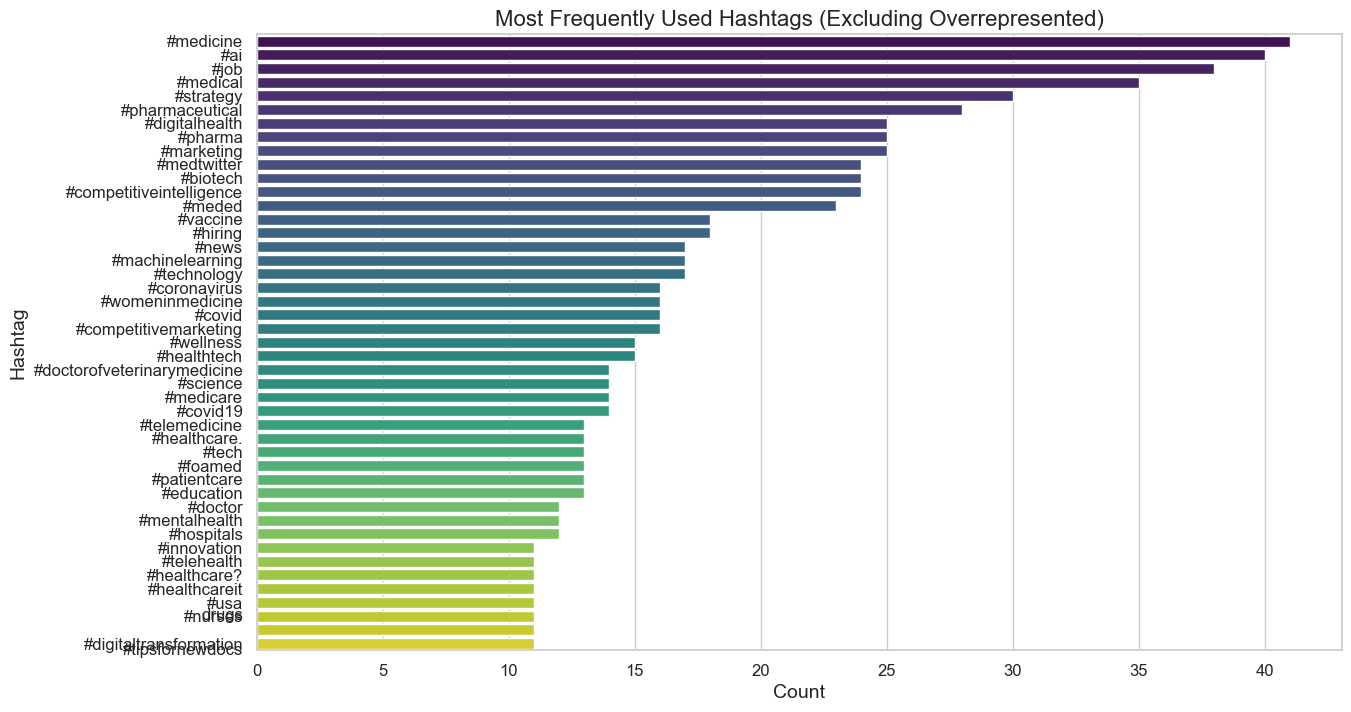

In [38]:

# Improving the visualization
# Adding color palette, adjusting font sizes, and rotating labels for clarity

# Ignore warnings.
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(14, 8))
sns.barplot(x='count', y='hashtag', 
            data=filtered_tags_df[filtered_tags_df['count'] > 10], 
            palette='viridis')

plt.title('Most Frequently Used Hashtags (Excluding Overrepresented)', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Hashtag', fontsize=14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()


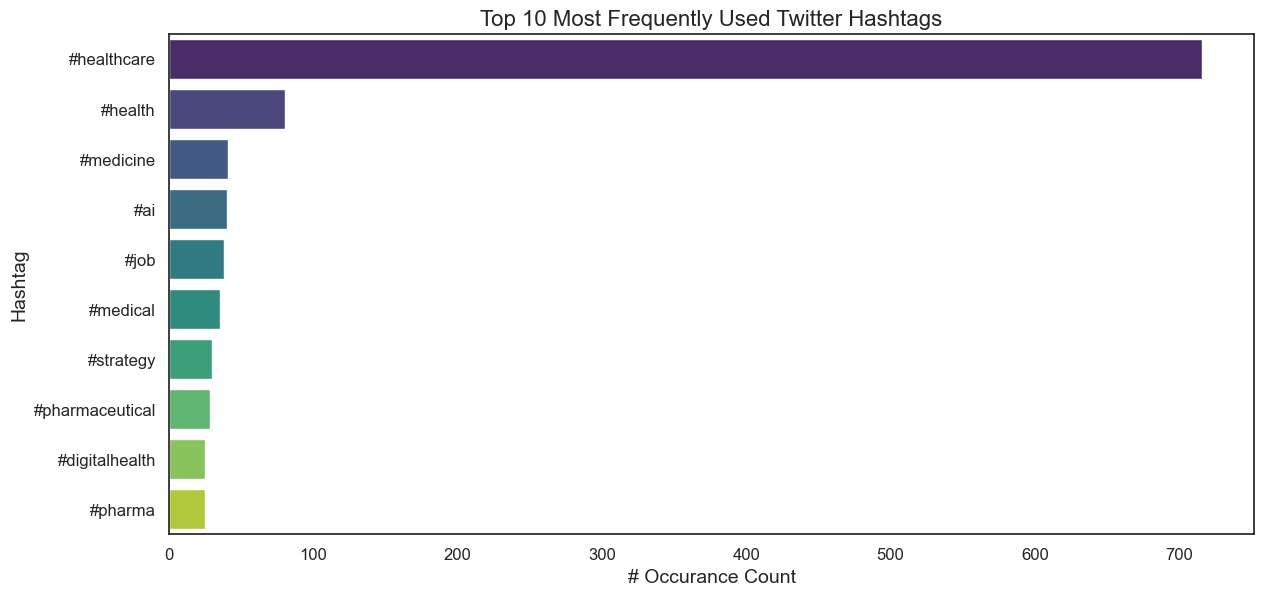

In [40]:
# Ignore warnings.
import warnings
warnings.filterwarnings('ignore')

#Filter the top 10 hashtags by count
top_10_tags_df = tags_df.head(10)

# Step 7: Create a Seaborn barplot of the top 10 hashtags
sns.set(style="white")

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(14, 6.5))

# Create the barplot
sns.barplot(x='count', y='hashtag', 
            data=top_10_tags_df, palette='viridis', ax=ax)

# Customize the plot
plt.title('Top 10 Most Frequently Used Twitter Hashtags', fontsize=16)
plt.xlabel('# Occurance Count', fontsize=14)
plt.ylabel('Hashtag', fontsize=14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Save the plot
plt.savefig('Twitter Hashtag count.png')

# Display the plot
plt.show()

Healthcare is the top trending hashtag, but the top 10 tweets don’t really mention the NHS in any useful way. If planning to invest money in X, it’s worth coming up with a strategy and getting a digitally skilled team on board

### Make recommendations to the NHS. 

In [165]:
# Prepare your workstation.
# Load the appointments_regional.csv file.
# View the DataFrame.

# Read the CSV file 'ar_clean.csv' into a DataFrame
ar_clean = pd.read_csv('appointments_regional_clean.csv')

# Display the first 5 entries of the 'appointment_date' column
print(ar_clean['appointment_month'].head())

0    2020-01
1    2020-01
2    2020-01
3    2020-01
4    2020-01
Name: appointment_month, dtype: object


In [167]:
# Print the min and max dates.

# Determine the min/ max months in sthe ar_clean df
min_month = ar_clean['appointment_month'].min()
max_month = ar_clean['appointment_month'].max()

# Print the minimum and maximum month in the desired format
print('Start month of the records in the ar_clean DataFrame:', min_month)
print('End month of the records in the ar_clean DataFrame:', max_month)

Start month of the records in the ar_clean DataFrame: 2020-01
End month of the records in the ar_clean DataFrame: 2022-06


In [169]:
# Filter the data set to only look at data from 2021-08 onwards.

# Filter the dataframe to include only rows from 2021-08 onwards
filtered_ar_clean = ar_clean[ar_clean['appointment_month'] >= '2021-08']

# Display the filtered dataframe
filtered_ar_clean.head()

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
3652,E54000034,2021-08,Attended,GP,Face-to-Face,1 Day,6553
3653,E54000034,2021-08,Attended,GP,Face-to-Face,15 to 21 Days,2390
3654,E54000034,2021-08,Attended,GP,Face-to-Face,2 to 7 Days,10547
3655,E54000034,2021-08,Attended,GP,Face-to-Face,22 to 28 Days,937
3656,E54000034,2021-08,Attended,GP,Face-to-Face,8 to 14 Days,4961


**Question 1:** Should the NHS start looking at increasing staff levels? 

In [171]:
# Create an aggregated data set to review the different features.
# View the DataFrame.

# filtered_ar_clean df was used ; time frame 8-2021 to 6-2022
# Group by the specified columns and calculate the sum of 'count_of_appointments'
ar_clean_agg = filtered_ar_clean.groupby(['appointment_month', 'hcp_type', 'appointment_status', 
                                          'appointment_mode', 'time_between_book_and_appointment'])\
                                           .agg({'count_of_appointments': 'sum'}).reset_index()

# View the new DataFrame 
ar_clean_agg.head()

,appointment_month,hcp_type,appointment_status,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,2021-08,GP,Attended,Face-to-Face,1 Day,507835
1,2021-08,GP,Attended,Face-to-Face,15 to 21 Days,194726
2,2021-08,GP,Attended,Face-to-Face,2 to 7 Days,959486
3,2021-08,GP,Attended,Face-to-Face,22 to 28 Days,102111
4,2021-08,GP,Attended,Face-to-Face,8 to 14 Days,398772


In [173]:
# Determine the total number of appointments per month.
# Add a new column to indicate the average utilisation of services.
# Monthly aggregate / 30 to get to a daily value.

# Group by 'appointment_month' and sum the 'count_of_appointments'
ar_clean_utls = filtered_ar_clean.groupby('appointment_month').\
                agg({'count_of_appointments': 'sum'}).reset_index()

# Calculate the average daily appointments and utilisation
# NHS provided average capacity per day
max_daily_capacity = 1200000

# Add a new column 'utilisation' to indicate average utilisation as a %
ar_clean_utls['utilisation %'] = (ar_clean_utls['count_of_appointments'] / 30) / max_daily_capacity * 100

# Round the utilisation value to one decimal place
ar_clean_utls['utilisation %'] = ar_clean_utls['utilisation %'].round(1)

# View the new DataFrame
ar_clean_utls


,appointment_month,count_of_appointments,utilisation %
0,2021-08,23843177,66.2
1,2021-09,28514685,79.2
2,2021-10,30296850,84.2
3,2021-11,30395923,84.4
4,2021-12,25132174,69.8
5,2022-01,25623928,71.2
6,2022-02,25344812,70.4
7,2022-03,29586020,82.2
8,2022-04,23904960,66.4
9,2022-05,27478652,76.3


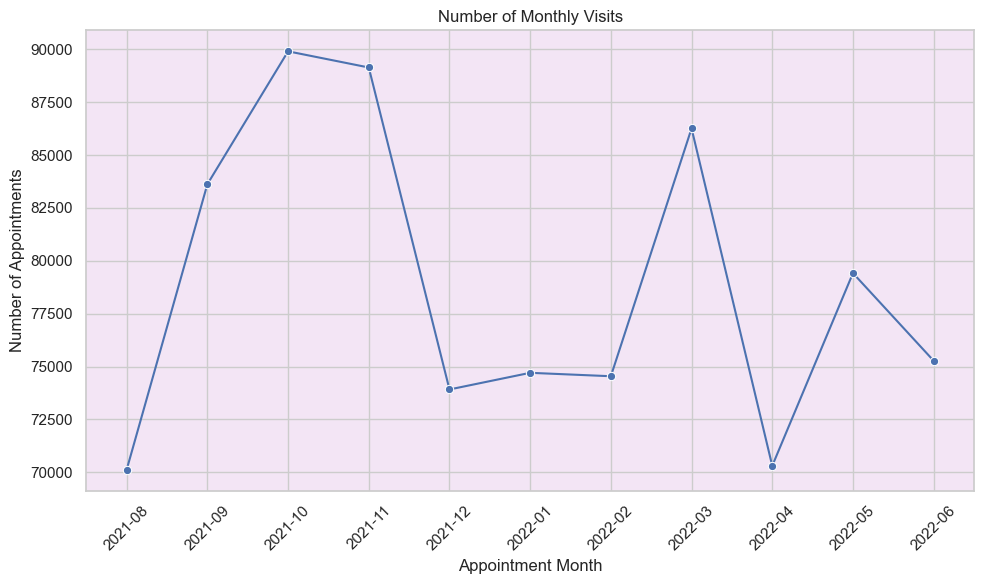

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert 'appointment_month' to string for easier plotting
ar_clean_agg['appointment_month'] = ar_clean_agg['appointment_month'].astype(str)
ar_clean_utls['appointment_month'] = ar_clean_utls['appointment_month'].astype(str)

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create the lineplot and assign it to 'ax'
plt.figure(figsize=(10, 6))
ax = sns.lineplot(data=ar_clean_agg, x='appointment_month', 
                  y='count_of_appointments', marker='o', errorbar=None)

# Set the plot area (axes) background color to light pastel purple
ax.set_facecolor('#F3E5F5')

plt.title('Number of Monthly Visits')
plt.xlabel('Appointment Month')
plt.ylabel('Number of Appointments')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


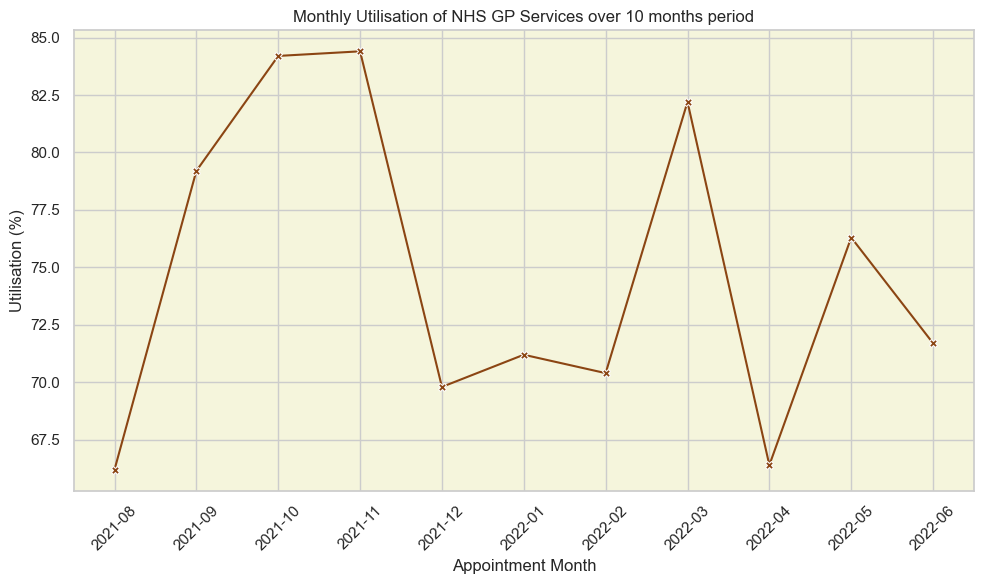

In [175]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create the lineplot and assign it to 'ax'
plt.figure(figsize=(10, 6))
ax = sns.lineplot(data=ar_clean_utls, x='appointment_month', 
                  y='utilisation %', marker='X', color='#8B4513')

# Set the plot area (axes) background color to a light yellow

ax.set_facecolor('#F5F5DC')
plt.title('Monthly Utilisation of NHS GP Services over 10 months period')
plt.xlabel('Appointment Month')
plt.ylabel('Utilisation (%)')

plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


**Average utilisation of services Using ar_clean df from 01/2020 to 6/2022**

In [177]:
# Determine the total number of appointments per month.
# Add a new column to indicate the average utilisation of services.
# Monthly aggregate / 30 to get to a daily value.

# Ensure 'appointment_month' is in datetime format
ar_clean['appointment_month'] = pd.to_datetime(ar_clean['appointment_month'])

# Group by 'appointment_month' and sum the 'count_of_appointments'(long = 01/2020 to 6/2022)
ar_utls_long = ar_clean.groupby('appointment_month').\
               agg({'count_of_appointments': 'sum'}).reset_index()

# Calculate the average daily appointments and utilisation
# NHS provided average capacity per day
max_daily_capacity = 1200000

# Add a new column 'utilisation' to indicate average utilisation as a %
ar_utls_long['utilisation %'] = (ar_utls_long['count_of_appointments'] / 30) / max_daily_capacity * 100

# Round the utilisation value to one decimal place
ar_utls_long['utilisation %'] = ar_utls_long['utilisation %'].round(1)

# View the new DataFrame
ar_utls_long.head()

,appointment_month,count_of_appointments,utilisation %
0,2020-01-01,27191758,75.5
1,2020-02-01,24097066,66.9
2,2020-03-01,24039635,66.8
3,2020-04-01,16002488,44.5
4,2020-05-01,16410591,45.6


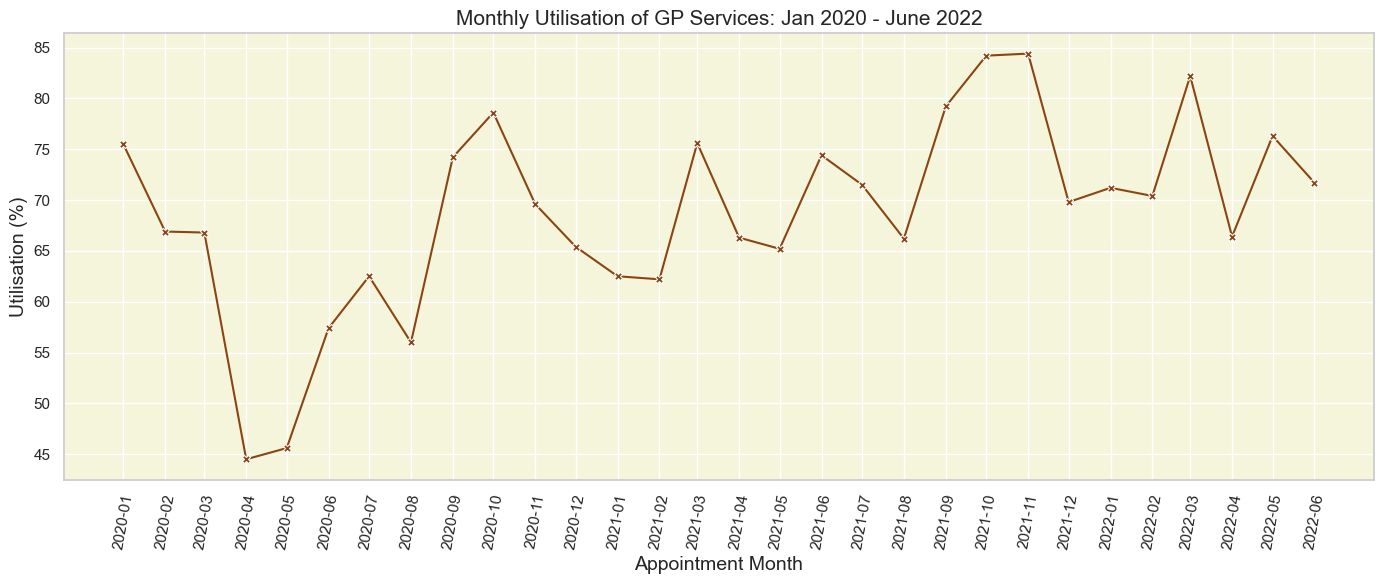

In [185]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import pandas as pd
from matplotlib.dates import DateFormatter 


# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create the lineplot and assign it to 'ax'
plt.figure(figsize=(14, 6))

ax = sns.lineplot(data=ar_utls_long, x='appointment_month', 
                  y='utilisation %', marker='X', color='#8B4513')

# Set the plot area (axes) background color to a light brown
ax.set_facecolor('#F5F5DC')

# Customize the grid line colors to white
ax.grid(True, color='white')

plt.title('Monthly Utilisation of GP Services: Jan 2020 - June 2022',fontsize=15)
plt.xlabel('Appointment Month',fontsize=14)
plt.ylabel('Utilisation (%)',fontsize=14)

# Format x-axis to show only year and month
ax.xaxis.set_major_formatter(DateFormatter('%Y-%m'))

# Set x-axis ticks for every month
ax.set_xticks(pd.date_range(start=ar_utls_long['appointment_month'].min(), 
                            end=ar_utls_long['appointment_month'].max(), 
                            freq='MS'))
plt.xticks(rotation=80)
plt.tight_layout()

# Save the plot
# plt.savefig('Utilisation of NHS GP Service_ar.png')

plt.show()


The NHS is aiming for 1.2 million appointments a day, so we might see utilisation rates hitting around 80-85%, especially during busy months. If demand keeps rising, we could even see those numbers go higher, which could put system on stress. But based on what I’ve seen, we can explore using underutilised resources, like bringing in other healthcare professionals and adding weekend shifts.

**Question 2:** How do the healthcare professional types differ over time?

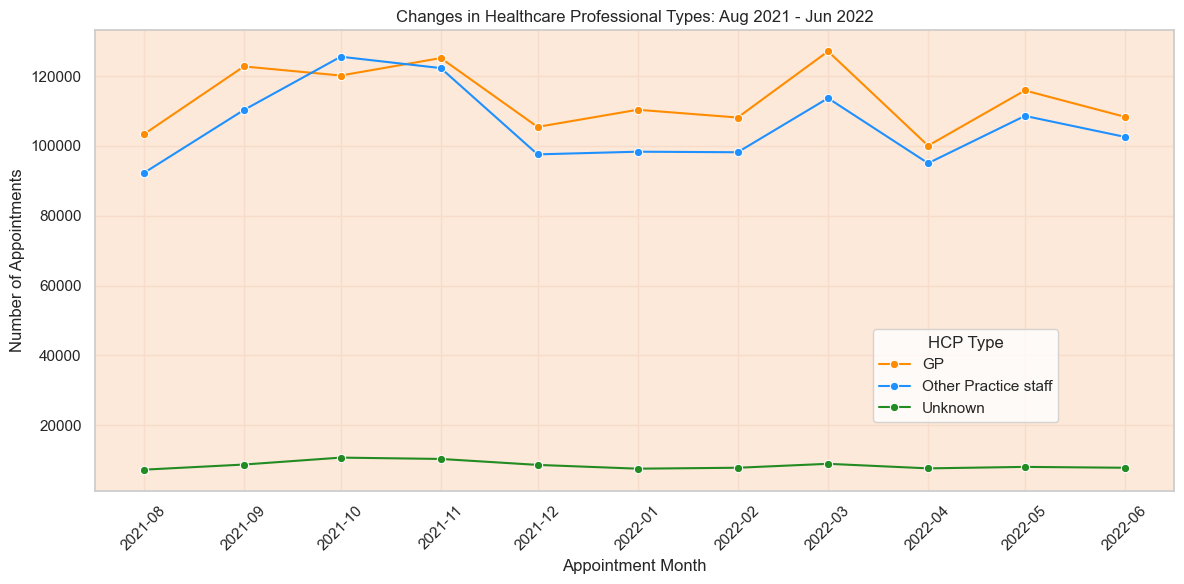

In [189]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.dates import DateFormatter

# Convert 'appointment_month' to datetime format
ar_clean_agg['appointment_month'] = pd.to_datetime(ar_clean_agg['appointment_month'])

# Define custom colors for each hcp_type
hcp_colors = {
    'GP': '#FF8C00',         # Deep Orange
    'Other Practice staff': '#1E90FF', # Blue
    'Unknown': '#228B22'     # Green
}

# Create the lineplot with custom colors
plt.figure(figsize=(12, 6))
ax = sns.lineplot(
    data=ar_clean_agg,
    x='appointment_month', 
    y='count_of_appointments', 
    hue='hcp_type', 
    palette=hcp_colors,  # Use the custom colors
    marker='o',
    errorbar=None
)

# Set the plot area (axes) background color 
ax.set_facecolor('#FDE9D9')

# Customize the grid line colors to less saturated orange
ax.grid(True, color='#F7DCCC')

# Move the legend further to the right inside the plot area
plt.legend(title='HCP Type', loc='center right', bbox_to_anchor=(0.90, 0.25))

plt.title('Changes in Healthcare Professional Types: Aug 2021 - Jun 2022')
plt.xlabel('Appointment Month')
plt.ylabel('Number of Appointments')

# Format x-axis to show only year and month
ax.xaxis.set_major_formatter(DateFormatter('%Y-%m'))

# Set x-axis ticks for every month
ax.set_xticks(pd.date_range(start=ar_clean_agg['appointment_month'].min(), 
                            end=ar_clean_agg['appointment_month'].max(), 
                            freq='MS'))

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.tight_layout()

# Save the plot
#plt.savefig('Changes in HCP Type - ar agg.png')

plt.show()


**HCP Change Using ar_clean df from 01/2020 to 6/2022**

In [544]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.dates import DateFormatter

# Read the CSV file 'ar_clean.csv' into a DataFrame
ar_clean = pd.read_csv('appointments_regional_clean.csv')

ar_clean.head()

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,E54000034,2020-01,Attended,GP,Face-to-Face,1 Day,8107
1,E54000034,2020-01,Attended,GP,Face-to-Face,15 to 21 Days,6791
2,E54000034,2020-01,Attended,GP,Face-to-Face,2 to 7 Days,20686
3,E54000034,2020-01,Attended,GP,Face-to-Face,22 to 28 Days,4268
4,E54000034,2020-01,Attended,GP,Face-to-Face,8 to 14 Days,11971


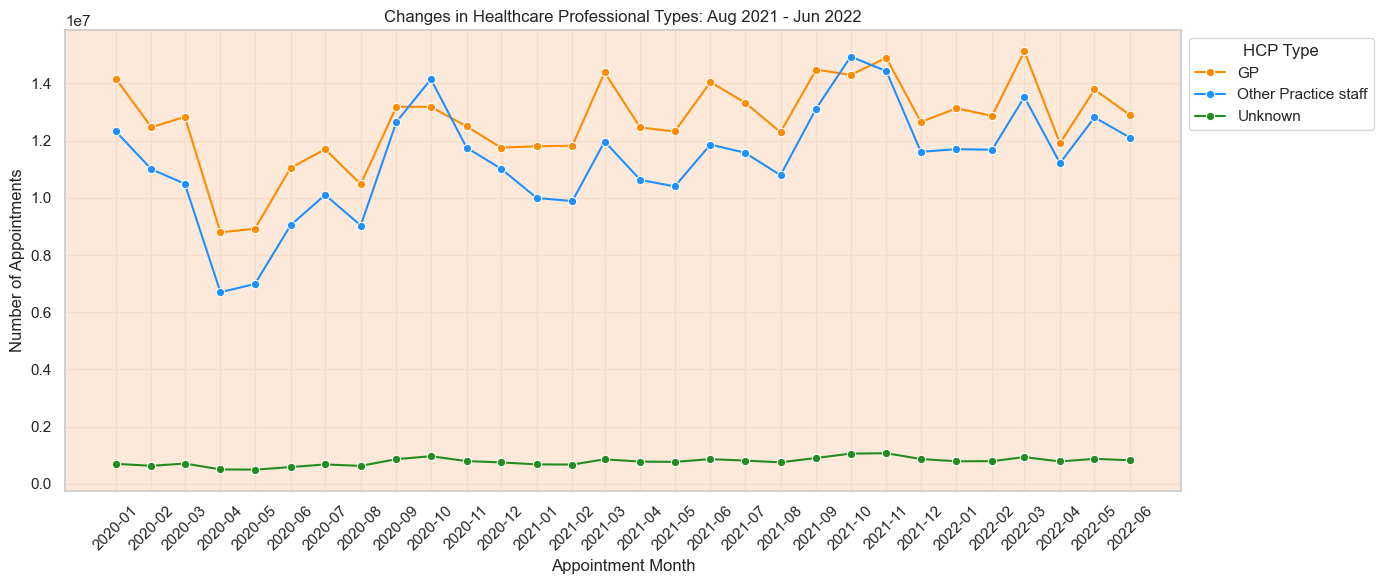

In [205]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.dates import DateFormatter

# Read the CSV file 'ar_clean.csv' into a DataFrame
ar_clean = pd.read_csv('appointments_regional_clean.csv')

# Group by 'appointment_month' and 'hcp_type', then sum the 'count_of_appointments'
ar_clean_HCP = ar_clean.groupby(['appointment_month', 'hcp_type']).\
               agg({'count_of_appointments': 'sum'}).reset_index()

# Convert 'appointment_month' to datetime format 
ar_clean_HCP['appointment_month'] = pd.to_datetime(ar_clean_HCP['appointment_month'])

# Define custom colors for each hcp_type
hcp_colors = {
    'GP': '#FF8C00',         # Deep Orange
    'Other Practice staff': '#1E90FF', # Blue
    'Unknown': '#228B22'     # Green
}

# Create the lineplot with custom colors
plt.figure(figsize=(14, 6))
ax = sns.lineplot(
    data=ar_clean_HCP,
    x='appointment_month', 
    y='count_of_appointments', 
    hue='hcp_type', 
    palette=hcp_colors, 
    marker='o',
    errorbar=None
)

# Set the plot area (axes) 
ax.set_facecolor('#FDE9D9')

# Customize the grid line colors to less saturated orange
ax.grid(True, color='#F7DCCC')

# Move the legend 
plt.legend(title='HCP Type', loc='upper left', bbox_to_anchor=(1, 1))

plt.title('Changes in Healthcare Professional Types: Aug 2021 - Jun 2022')
plt.xlabel('Appointment Month')
plt.ylabel('Number of Appointments')

# Format x-axis to show only year and month
ax.xaxis.set_major_formatter(DateFormatter('%Y-%m'))

# Set x-axis ticks for every month
ax.set_xticks(pd.date_range(start=ar_clean_HCP['appointment_month'].min(), 
                            end=ar_clean_HCP['appointment_month'].max(), 
                            freq='MS'))

# Rotate x-axis labels 
plt.xticks(rotation=45)
plt.tight_layout()

# Save the plot
# plt.savefig('Changes in HCP Type - ar df.png')

# Show the plot
plt.show()


GPs have been handling most of the appointments, but other practice staff (OPS) have been really helpful too. The 'other staff' category isn’t clearly defined, which makes it hard to fully understand their impact. It would’ve been better if it was broken down more. Interestingly, OPS actually took on more appointments than GPs during peak times, like late summer and early autumn, which shows they’re playing a big role and could be even more useful in other months too

**Question 3:** Are there significant changes in whether or not visits are attended?

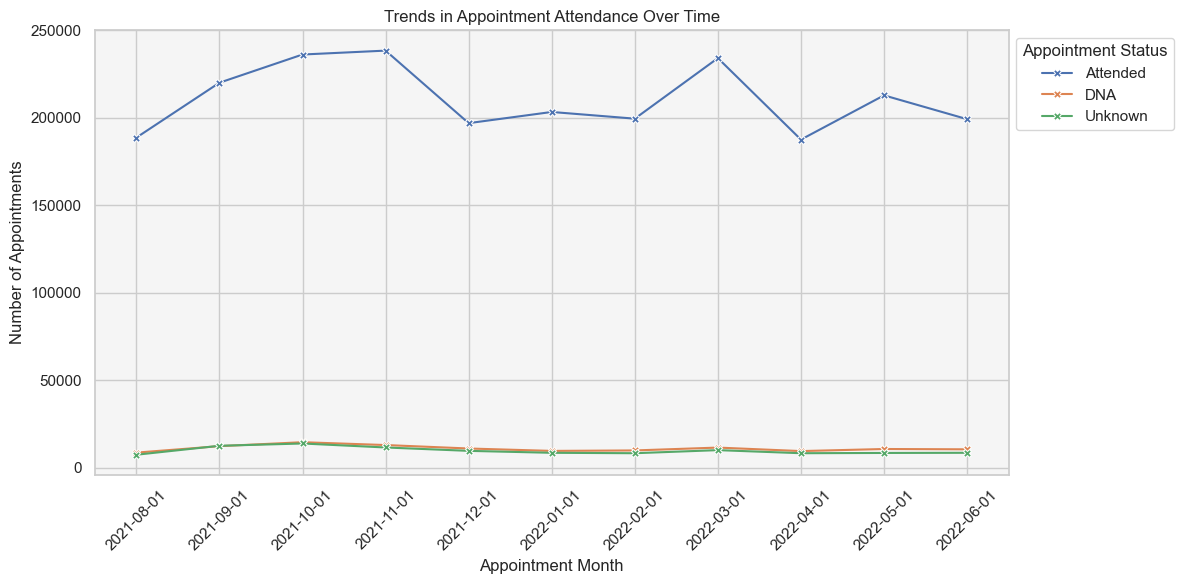

In [207]:
# Create a line plot to answer the question.

# Ensure 'appointment_month' is a string 
ar_clean_agg['appointment_month'] = ar_clean_agg['appointment_month'].astype(str)

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create the lineplot
plt.figure(figsize=(12, 6))
ax = sns.lineplot(
    data=ar_clean_agg,
    x='appointment_month', 
    y='count_of_appointments', 
    hue='appointment_status',   
    marker='X',
   errorbar=None
)

# Set the plot area (axes) background color to very light grey
ax.set_facecolor('#F5F5F5')

# Move the legend to the top right, outside the plot
plt.legend(title='Appointment Status', loc='upper left', bbox_to_anchor=(1, 1))

plt.title('Trends in Appointment Attendance Over Time')
plt.xlabel('Appointment Month')
plt.ylabel('Number of Appointments')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Attendance Using ar_clean df from 01/2020 to 6/2022**

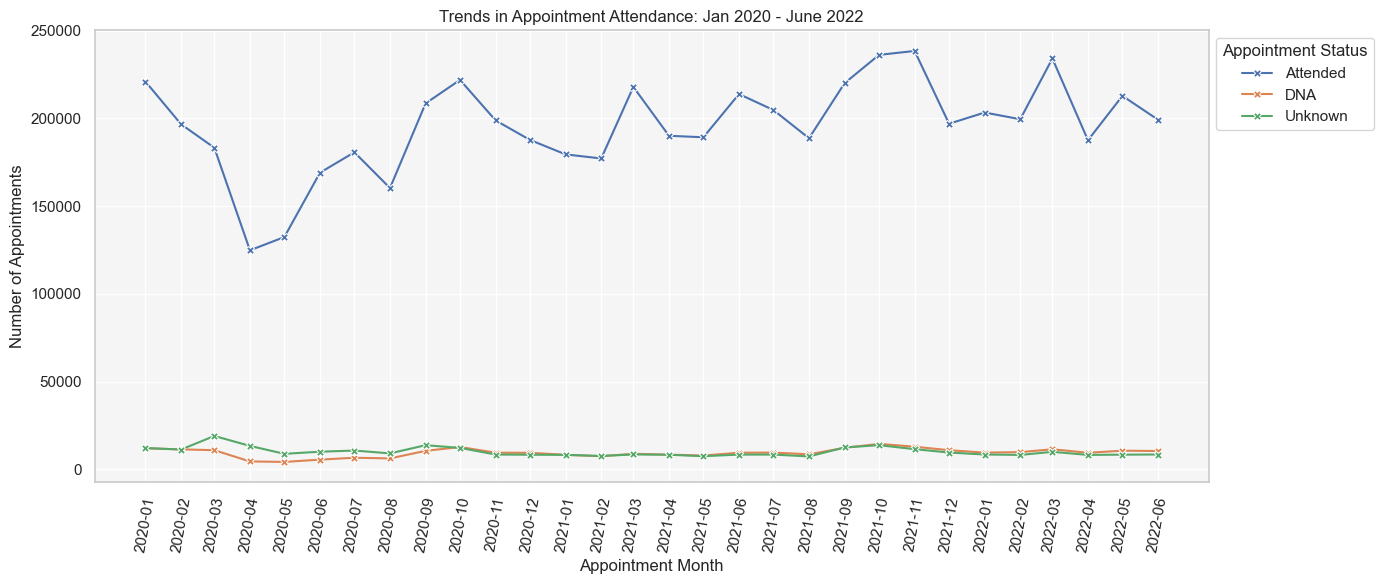

In [211]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import DateFormatter

# Group by the specified columns and calculate the sum of 'count_of_appointments'
ar_clean = ar_clean.groupby(['appointment_month', 'hcp_type', 'appointment_status', 
                              'appointment_mode', 'time_between_book_and_appointment'])\
                              .agg({'count_of_appointments': 'sum'}).reset_index()

# Convert 'appointment_month' to datetime format 
ar_clean['appointment_month'] = pd.to_datetime(ar_clean['appointment_month'])

# Set the style of the plots
sns.set(style="whitegrid")

# Create the lineplot and get the Axes object
plt.figure(figsize=(14, 6))
ax = sns.lineplot(
    data=ar_clean,
    x='appointment_month', 
    y='count_of_appointments', 
    hue='appointment_status',   
    marker='X',
    errorbar=None
)

# Set the plot area (axes) background color to very light grey
ax.set_facecolor('#F5F5F5')

# Customize the grid line colors to white
ax.grid(True, color='white')

# Move the legend to the top right, outside the plot
plt.legend(title='Appointment Status', loc='upper left', bbox_to_anchor=(1, 1))

plt.title('Trends in Appointment Attendance: Jan 2020 - June 2022')
plt.xlabel('Appointment Month')
plt.ylabel('Number of Appointments')

# Format x-axis to show only year and month
ax.xaxis.set_major_formatter(DateFormatter('%Y-%m'))

# Set x-axis ticks for every month
ax.set_xticks(pd.date_range(start=ar_clean['appointment_month'].min(), 
                            end=ar_clean['appointment_month'].max(), 
                            freq='MS'))

plt.xticks(rotation=80)
plt.tight_layout()

# Save the plot
# plt.savefig('Trends in Appointment Attendance_ar clean')

plt.show()



Contrary to what the news said, this actually shows that, aside from the early COVID lockdown days, national appointment attendance rates have been pretty high, almost always above 90%, compared to the 'Did Not Attend' (DNA) rates. However, it doesn’t break down regional attendance levels. It could be worth looking into regional data to see if any specific areas have been dealing with low attendance

**Question 4:** Are there changes in terms of appointment type and the busiest months?

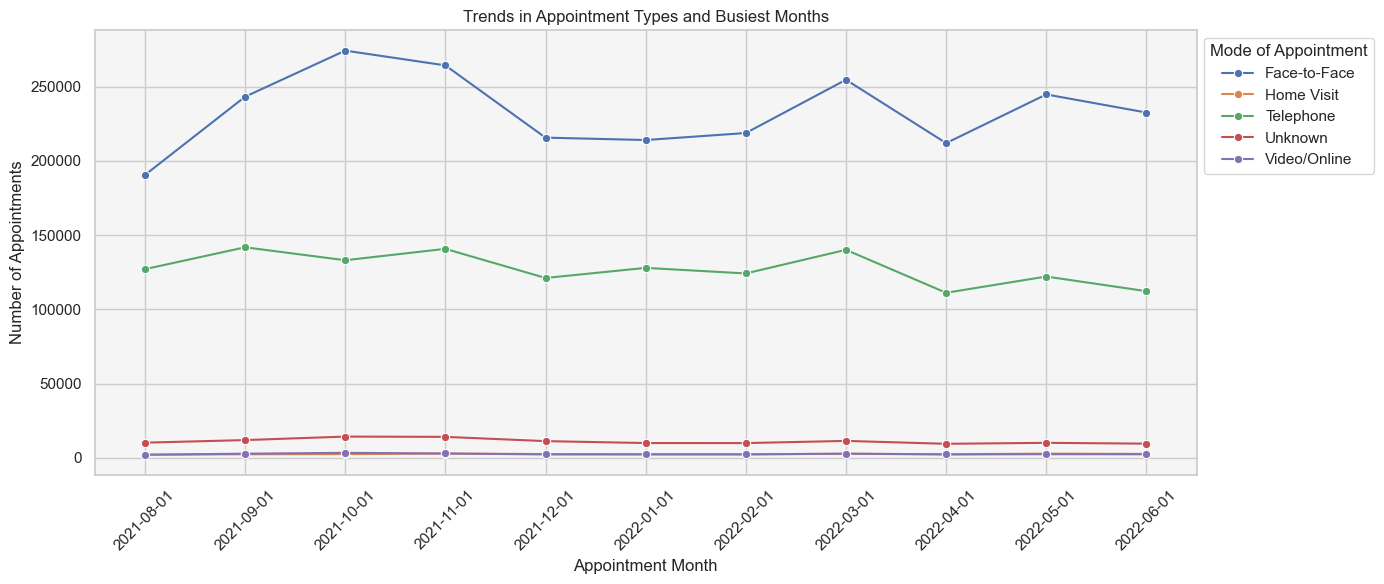

In [213]:
# 'appointment_month' is a string 
ar_clean_agg['appointment_month'] = ar_clean_agg['appointment_month'].astype(str)

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create the lineplot
plt.figure(figsize=(14, 6))
ax = sns.lineplot(
    data=ar_clean_agg,
    x='appointment_month', 
    y='count_of_appointments', 
    hue='appointment_mode', 
    marker='o',
    errorbar=None
)

# Set the plot area (axes) background color to light grey
ax.set_facecolor('#F5F5F5')

# Move the legend to the top right, outside the plot
plt.legend(title='Mode of Appointment', loc='upper left', bbox_to_anchor=(1, 1))

plt.title('Trends in Appointment Types and Busiest Months')
plt.xlabel('Appointment Month')
plt.ylabel('Number of Appointments')

plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

**Using ar_clean df from 01/2020 to 6/2022**

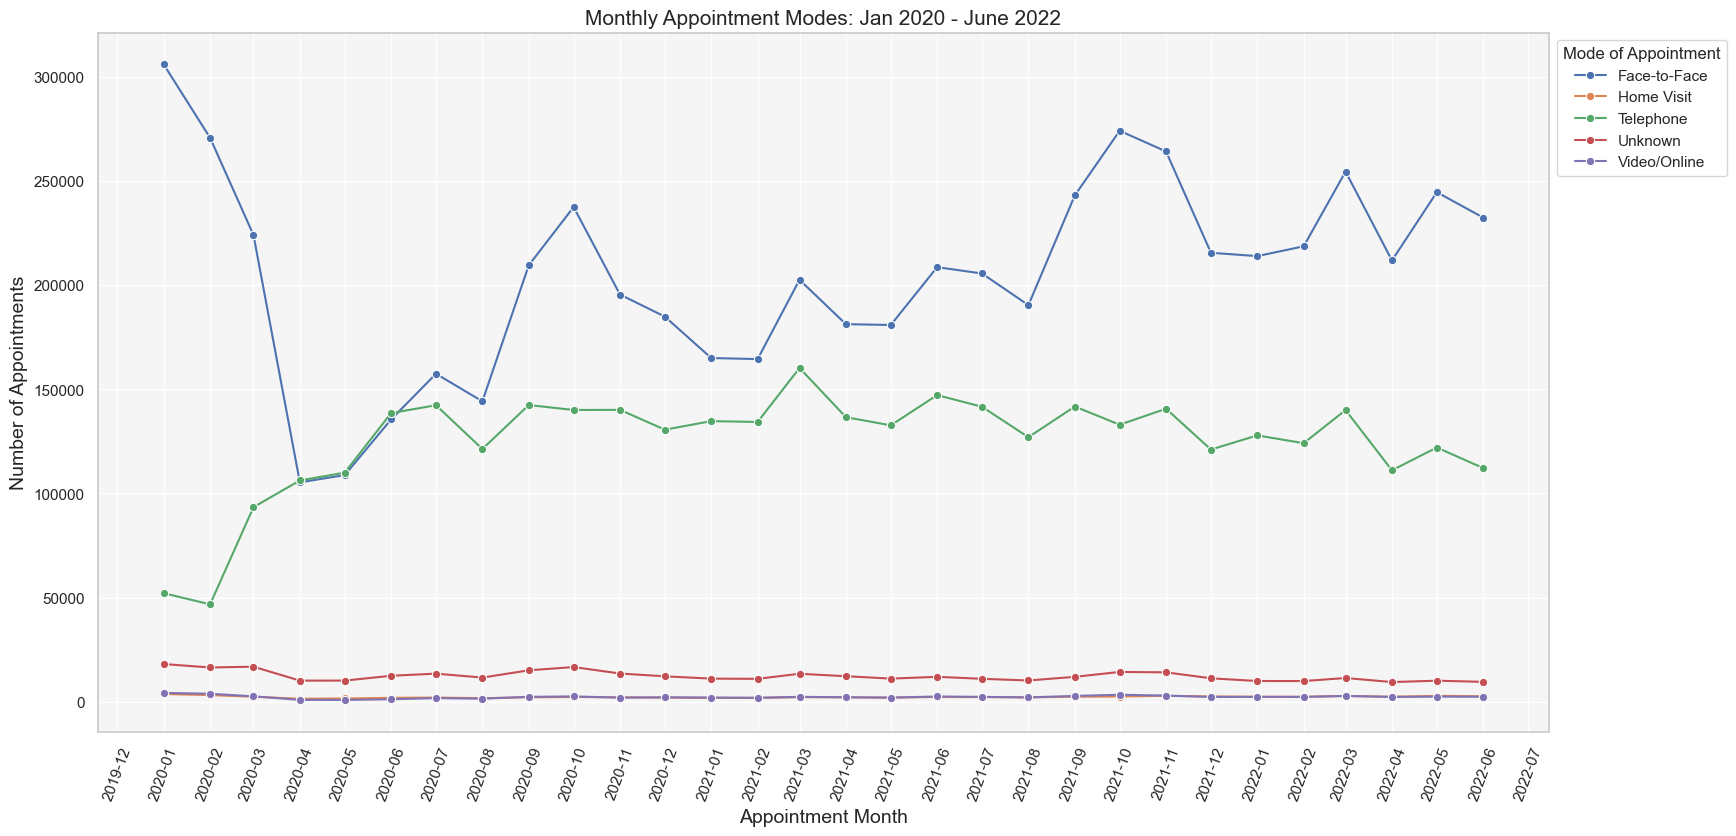

In [215]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib.dates import DateFormatter, MonthLocator

# Ensure 'appointment_month' is in datetime format
ar_clean['appointment_month'] = pd.to_datetime(ar_clean['appointment_month'])

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create the lineplot
plt.figure(figsize=(18,9))
ax = sns.lineplot(
    data=ar_clean,
    x='appointment_month', 
    y='count_of_appointments', 
    hue='appointment_mode',  
    marker='o',
    errorbar=None
)

# Set the plot area (axes) background color to light grey
ax.set_facecolor('#F5F5F5')

# Customize the grid line colors to white
ax.grid(True, color='white')

# Move the legend to the top right, outside the plot
plt.legend(title='Mode of Appointment', loc='upper left', bbox_to_anchor=(1, 1))


plt.title('Monthly Appointment Modes: Jan 2020 - June 2022', fontsize=15)
plt.xlabel('Appointment Month', fontsize=14)
plt.ylabel('Number of Appointments', fontsize=14)

# Format x-axis to show only year and month
ax.xaxis.set_major_formatter(DateFormatter('%Y-%m'))

# Set major ticks for every month and minor ticks for all months
ax.xaxis.set_major_locator(MonthLocator())
ax.xaxis.set_minor_locator(MonthLocator())

# Enable grid for minor ticks as well
ax.grid(True, which='both', color='white')

# Rotate x-axis labels for better readability
plt.xticks(rotation=70)

# Save the plot
# plt.savefig('Monthly Appointment Counts by Mode.png')

plt.tight_layout(pad=2.5)

plt.show()


During the first lockdown, face-to-face appointments dropped significantly, and telephone appointments really took off, quickly becoming the second most popular way to reach GPs. While face-to-face appointments gradually increased, they still hadn’t gotten back to pre-pandemic levels by summer 2022. At the same time, telephone appointments stayed popular but started to decline after spring 2021. wonder whether this shift is more about GPs' choice  or what patients choice

**Question 5:** Are there any trends in time between booking and appointment?

In [251]:
import pandas as pd
# Read the CSV file 'ar_clean.csv' into a DataFrame
ar_clean = pd.read_csv('appointments_regional_clean.csv')

# Find the unique contents in the "time_between_book_and_appointment" column
unique_values = ar_clean["time_between_book_and_appointment"].unique()

# Display the unique values
print(unique_values)


['1 Day' '15  to 21 Days' '2 to 7 Days' '22  to 28 Days' '8  to 14 Days'
 'More than 28 Days' 'Same Day' 'Unknown / Data Quality']


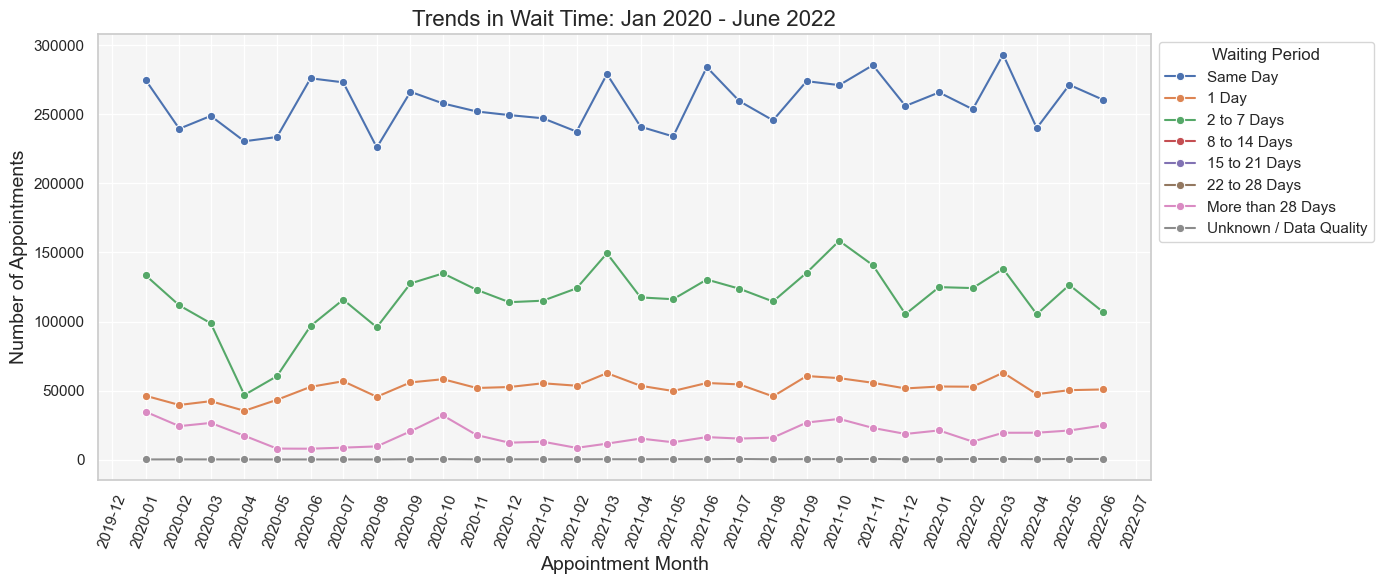

In [219]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib.dates import DateFormatter, MonthLocator

# Define the categorical order for 'time_between_book_and_appointment'
time_order = [
    "Same Day", "1 Day", "2 to 7 Days", "8 to 14 Days", 
    "15 to 21 Days", "22 to 28 Days", "More than 28 Days", 
    "Unknown / Data Quality"
]

# Convert 'time_between_book_and_appointment' to a categorical type with the specified order
ar_clean['time_between_book_and_appointment'] = pd.Categorical(ar_clean['time_between_book_and_appointment'], 
                                                categories=time_order, ordered=True)

# Convert 'appointment_month' to datetime format for proper plotting
ar_clean['appointment_month'] = pd.to_datetime(ar_clean['appointment_month'])

# Customize the grid line colors to white
ax.grid(True, color='white')

# Create the lineplot
plt.figure(figsize=(14, 6))
ax = sns.lineplot(data=ar_clean, x='appointment_month', 
                  y='count_of_appointments', hue='time_between_book_and_appointment',   
                  marker='o', errorbar=None)

# Set the plot area (axes) background color to very light grey
ax.set_facecolor('#F5F5F5')

# Move the legend to the top right, outside the plot
plt.legend(title='Waiting Period', loc='upper left', bbox_to_anchor=(1, 1))

plt.title('Trends in Wait Time: Jan 2020 - June 2022', fontsize=16)
plt.xlabel('Appointment Month', fontsize=14)
plt.ylabel('Number of Appointments', fontsize=14)

# Format x-axis to show only year and month
ax.xaxis.set_major_formatter(DateFormatter('%Y-%m'))

# Set major ticks for every month and minor ticks for all months
ax.xaxis.set_major_locator(MonthLocator())
ax.xaxis.set_minor_locator(MonthLocator())

# Enable grid for minor ticks as well
ax.grid(True, which='both', color='white')

# Rotate x-axis labels for better readability
plt.xticks(rotation=70)
plt.tight_layout()


## Save the plot
# plt.savefig('Trends in Wait Time_ar df png')

plt.show()


Same-day appointments have been available throughout this period, except for a slight dip during the first COVID lockdown. Interestingly, the second most popular appointment type isn’t for the following day, but patients often have to wait 2-7 days. That’s a pretty broad range, like 3 days or even 5 days. It’s worth looking into why next-day appointments aren’t more available—maybe it’s due to a lack of staff or reduced weekend work

**Question 6:** How do the various service settings compare?

In [221]:
# Let's go back to the national category DataFrame you created in an earlier assignment activity.

# Import and sense-check the national_categories.xlsx data set as nc.
nc = pd.read_excel('national_categories.xlsx')

# View the DataFrame.
nc.head()

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
0,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Patient contact during Care Home Round,3,2021-08
1,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Other,Care Related Encounter,Planned Clinics,7,2021-08
2,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Home Visit,79,2021-08
3,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,General Consultation Acute,725,2021-08
4,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Structured Medication Review,2,2021-08


In [358]:
# Create a new DataFrame consisting of the month of appointment and the number of appointments.
# View the DataFrame.

# Grouping by appointment_month and summing the count_of_appointments
nc_monthly_appointments = nc.groupby('appointment_month')\
                          ['count_of_appointments'].sum().reset_index()

# View the new DataFrame
nc_monthly_appointments.head()


,appointment_month,count_of_appointments
0,2021-08,23852171
1,2021-09,28522501
2,2021-10,30303834
3,2021-11,30405070
4,2021-12,25140776


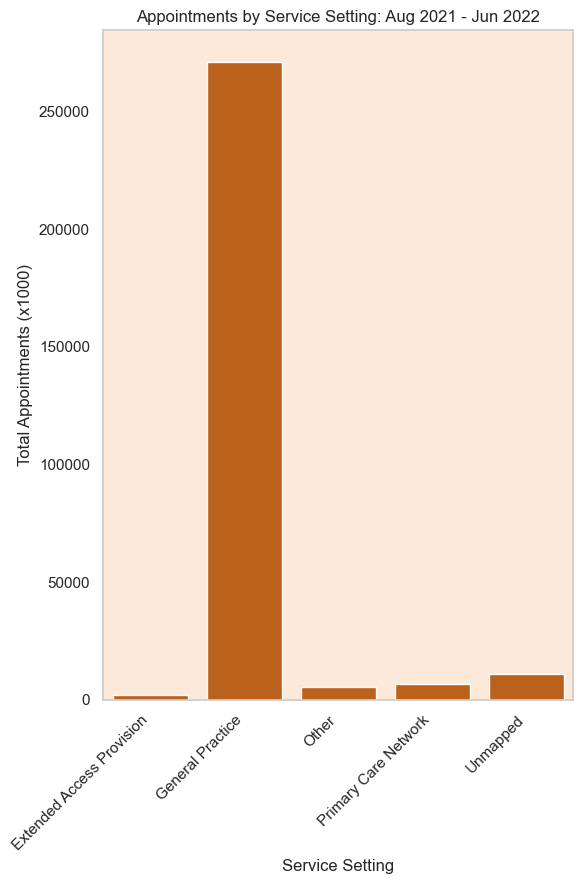

In [224]:
import seaborn as sns
import matplotlib.pyplot as plt

# Grouping by service_setting and summing the count_of_appointments
service_setting_appointments = nc.groupby('service_setting')\
                               ['count_of_appointments'].sum().reset_index()

# Scale the count_of_appointments to thousands
service_setting_appointments['count_of_appointments'] = service_setting_appointments['count_of_appointments'] / 1000

# Set the color palette to a colorblind-friendly one
colorblind_palette = sns.color_palette("colorblind")

# Plotting the data
plt.figure(figsize=(6, 9))

# Disable the grid
plt.grid(False)

# Use the fourth color in the colorblind palette (index 3)
ax = sns.barplot(y='count_of_appointments', x='service_setting', 
            data=service_setting_appointments, color=colorblind_palette[3])

# Set the plot area (axes) background color to light orange
ax.set_facecolor('#FDE9D9')

plt.title('Appointments by Service Setting: Aug 2021 - Jun 2022')
plt.xlabel('Service Setting')
plt.ylabel('Total Appointments (x1000)')
plt.xticks(rotation=45, ha='right')

# Adjust layout 
plt.tight_layout()

# Save the plot
# plt.savefig('Appointments by Service Setting _nc df')

plt.show()


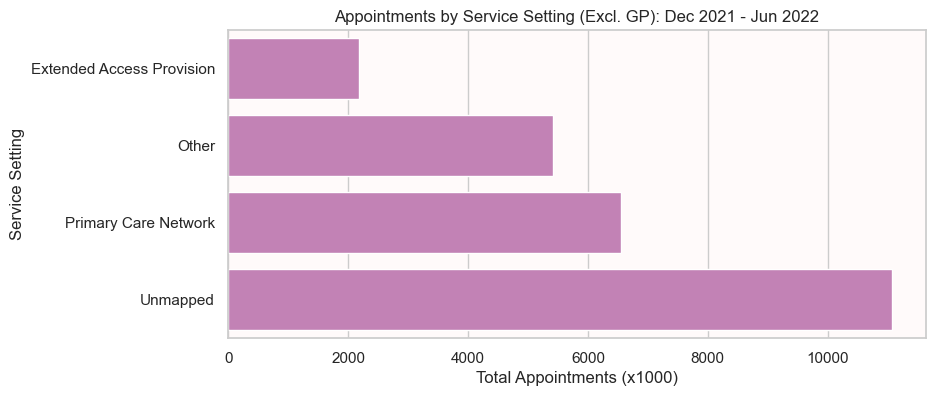

In [226]:
import matplotlib.pyplot as plt
import seaborn as sns

# Import and sense-check the national_categories.xlsx data set as nc.
nc = pd.read_excel('national_categories.xlsx')

# View the DataFrame.
nc

# Filtering out GP Visits
non_gp = nc[nc['service_setting']!= 'General Practice']

# Grouping by service_setting and summing the count_of_appointments
filtered_ss = non_gp.groupby('service_setting')['count_of_appointments'].sum().reset_index()

# Scale the count_of_appointments to thousands
filtered_ss['count_of_appointments'] = filtered_ss['count_of_appointments'] / 1000

# Plotting the data
plt.figure(figsize=(9, 4))

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create the plot
ax = sns.barplot(x='count_of_appointments', y='service_setting', 
                 data=filtered_ss, color=colorblind_palette[4])

# Set the plot area (axes) background color to light white
ax.set_facecolor('snow')

# Adding titles and labels
plt.title('Appointments by Service Setting (Excl. GP): Dec 2021 - Jun 2022')
plt.ylabel('Service Setting')
plt.xlabel('Total Appointments (x1000)')

# Display the plot
plt.show()



In terms of service settings, GPs are handling about 25 times more work than other settings. NHS guidelines suggest that PCNs should be stepping in to help with late evening and weekend appointments, so we should definitely look into using those resources to lighten the GPs' workload. Also, when we look at service settings, the amount of unmapped data, aside from GPs, is the highest—about 40% more than the primary care network data. This highlights a real need for better data recording, management systems, and training. It’s definitely an area that needs improvement.

**Average consultataion times using ad_regions df**

In [216]:
# Use NHS regions code file ('nhs_regions.csv')downloaded from/
# 'Integrated Care Boards (July 2022) Names and Codes in EN' and/
# merged with the ad frame

import pandas as pd

# Read the CSV file 'actual_duration.csv' into a DataFrame
ad = pd.read_csv('actual_duration.csv')

# Read the CSV file 'nhs_regions.csv' into a DataFrame
regions = pd.read_csv('nhs_regions.csv')

# Merging the data frames
ad_regions = pd.merge(ad, regions, on='region_ons_code', how='left')

# Save the merged DataFrame 'ad_regions' as a CSV file
ad_regions.to_csv('ad_regions.csv', index=False)


In [218]:
# Display the first few rows to check the merge
ad_regions.head()

,sub_icb_location_code,sub_icb_location_ons_code,sub_icb_location_name,icb_ons_code,region_ons_code,appointment_date,actual_duration,count_of_appointments,nhs_regions
0,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,31-60 Minutes,364,North East and Yorkshire
1,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,21-30 Minutes,619,North East and Yorkshire
2,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,6-10 Minutes,1698,North East and Yorkshire
3,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,Unknown / Data Quality,1277,North East and Yorkshire
4,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,16-20 Minutes,730,North East and Yorkshire


In [56]:
# Display the finformation of ad_regions df
ad_regions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137793 entries, 0 to 137792
Data columns (total 9 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   sub_icb_location_code      137793 non-null  object
 1   sub_icb_location_ons_code  137793 non-null  object
 2   sub_icb_location_name      137793 non-null  object
 3   icb_ons_code               137793 non-null  object
 4   region_ons_code            137793 non-null  object
 5   appointment_date           137793 non-null  object
 6   actual_duration            137793 non-null  object
 7   count_of_appointments      137793 non-null  int64 
 8   nhs_regions                137793 non-null  object
dtypes: int64(1), object(8)
memory usage: 9.5+ MB


In [52]:
# List unique values in the 'nhs_regions' column
unique_nhs_regions = ad_regions['nhs_regions'].unique()

# Display the unique contents
list(unique_nhs_regions )

['North East and Yorkshire',
 'North West',
 'Midlands',
 'East of England',
 'South East',
 'South West',
 'London']

In [4]:
# List unique values in the 'actual_duration' column
unique_durations = ad['actual_duration'].unique()

# Display the unique contents
list(unique_durations)


['31-60 Minutes',
 '21-30 Minutes',
 '6-10 Minutes',
 'Unknown / Data Quality',
 '16-20 Minutes',
 '11-15 Minutes',
 '1-5 Minutes']

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Convert appointment_date to datetime format
ad_regions['appointment_date'] = pd.to_datetime(ad['appointment_date'], format='%d-%b-%y')

# Map actual_duration to numerical values
duration_mapping = {
    '1-5 Minutes': 3,
    '6-10 Minutes': 8,
    '11-15 Minutes': 13,
    '16-20 Minutes': 18,
    '21-30 Minutes': 25,
    '31-60 Minutes': 45,
    'Unknown / Data Quality': np.nan 
}

ad_regions['duration_minutes'] = ad_regions['actual_duration'].map(duration_mapping)

# Handle missing or 'Unknown / Data Quality' values
ad_regions = ad_regions.dropna(subset=['duration_minutes'])

#b Group by location and date, then calculate the mean duration
avg_duration_per_location = ad_regions.groupby(['nhs_regions', 
                                                'appointment_date'])['duration_minutes'].mean().reset_index()

# Calculate overall average duration per location
overall_avg_duration = avg_duration_per_location.groupby('nhs_regions')\
                       ['duration_minutes'].mean().round(2).reset_index()
# Rename columns for clarity
overall_avg_duration.columns = ['NHS Region', 'Average Consultation Time(minutes)']

# View df
overall_avg_duration

,NHS Region,Average Consultation Time(minutes)
0,East of England,18.34
1,London,18.49
2,Midlands,18.20
3,North East and Yorkshire,18.32
4,North West,18.18
5,South East,18.36
6,South West,18.52


The average consultation time across seven regions seems to be around 18 minutes, but Not sure how realistic that is (it feels a bit off based on my experience!). It might be worth digging into this at a more detailed level, like at the Sub-ICB level. Plus, according to the metadata, it’s unclear if this data followed a standard, so I’m not too confident in its accuracy

**Creating a Time Line for the dfs**

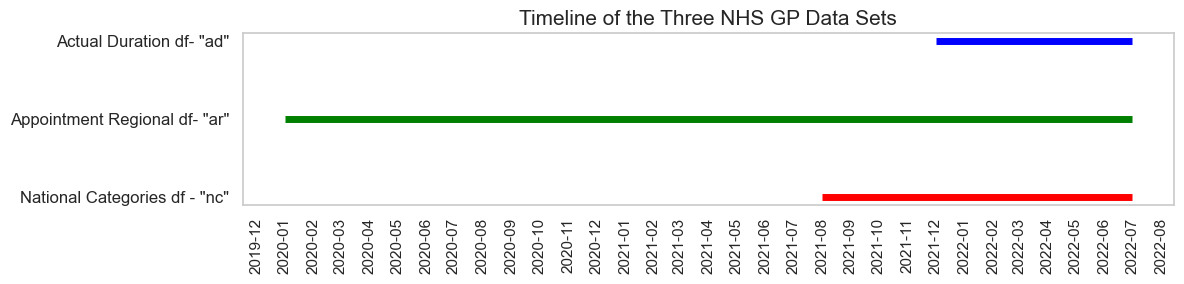

In [228]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates

# Actual duration data (ad) – 01/12/2021 to 30/06/2022
ad = pd.DataFrame({
    'Date': pd.date_range(start='2021-12-01', end='2022-06-30', freq='D')
})
ad.set_index('Date', inplace=True)

# Appointment regional data (ar) – 01/01/2020 to 30/06/2022
ar = pd.DataFrame({
    'Date': pd.date_range(start='2020-01-01', end='2022-06-30', freq='D')
})
ar.set_index('Date', inplace=True)

# National categories data (nc) – 01/08/2021 to 30/06/2022
nc = pd.DataFrame({
    'Date': pd.date_range(start='2021-08-01', end='2022-06-30', freq='D')
})
nc.set_index('Date', inplace=True)

# Extract start and end dates for each data frame
ad_start, ad_end = ad.index.min(), ad.index.max()
ar_start, ar_end = ar.index.min(), ar.index.max()
nc_start, nc_end = nc.index.min(), nc.index.max()

# Plot the timeline with horizontal lines
plt.figure(figsize=(12,3)) 

# Plot a line for each data frame
plt.hlines(y=3, xmin=ad_start, xmax=ad_end, color='blue', label='Actual Duration', linewidth=5)
plt.hlines(y=2, xmin=ar_start, xmax=ar_end, color='green', label='Appointment Regional', linewidth=5)
plt.hlines(y=1, xmin=nc_start, xmax=nc_end, color='red', label='National Categories', linewidth=5)

# Formatting the plot
plt.yticks([1, 2, 3], ['National Categories df - "nc"', 
                       'Appointment Regional df- "ar"', 
                       'Actual Duration df- "ad"'], fontsize=12)

plt.title('Timeline of the Three NHS GP Data Sets', fontsize=15)

# Set the major and minor ticks on the x-axis
# Major ticks every month
plt.gca().xaxis.set_major_locator(mdates.MonthLocator()) 
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Remove the grid
plt.grid(False)

plt.xticks(rotation=90)

# Adjust layout to make space for labels
plt.tight_layout()

# Save the plot with tight bounding box to avoid cutting off labels
# plt.savefig('Timeline of the Three NHS GP Data SetS.png', bbox_inches='tight')

# Display the plot
plt.show()


# 